In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta
from bokeh.palettes import BrBG, PiYG, RdGy, RdYlGn, YlGnBu

In [62]:
b = bagreader('500Pose.bag')
b.topic_table


[INFO]  Data folder 500Pose already exists. Not creating.


Topics  \
0                                      /CurrentMotion   
1                                          /UserForce   
2                                       /client_count   
3                                  /connected_clients   
4                                  /contact_direction   
5                                   /default_ext_load   
6                               /desired_joint_states   
7   /dynamic_reconfigure_compliance_param_node/par...   
8   /dynamic_reconfigure_compliance_param_node/par...   
9                                   /equilibrium_pose   
10                    /equilibrium_pose_marker/update   
11               /equilibrium_pose_marker/update_full   
12                /franka_control/error_recovery/goal   
13              /franka_control/error_recovery/result   
14              /franka_control/error_recovery/status   
15                     /franka_state_controller/F_ext   
16             /franka_state_controller/franka_states   
17              /franka_state_controller/joint_states   
18      /franka_state_controller/joint_states_desired   
19                                      /joint_states   
20                              /joint_states_desired   
21                                    /recorded_force   
22                        /recorded_force_no_vertical   
23                               /recorded_trajectory   
24                                    /reversed_force   
25                                            /rosout   
26                                        /rosout_agg   
27                                                /tf   
28                                         /tf_static   

                                         Types  Message Count   Frequency  
0                              sensor_msgs/Joy            759   22.765436  
1                              sensor_msgs/Joy            968   22.775449  
2                               std_msgs/Int32              1         NaN  
3              rosbridge_msgs/ConnectedClients              1         NaN  
4                              sensor_msgs/Joy            966   22.786338  
5                              sensor_msgs/Joy           1124   29.411422  
6                       sensor_msgs/JointState            904   30.003891  
7        dynamic_reconfigure/ConfigDescription              1         NaN  
8                   dynamic_reconfigure/Config              1         NaN  
9                    geometry_msgs/PoseStamped           7672  200.014497  
10  visualization_msgs/InteractiveMarkerUpdate             77    2.000481  
11    visualization_msgs/InteractiveMarkerInit              1         NaN  
12      franka_control/ErrorRecoveryActionGoal            968   22.783986  
13       franka_msgs/ErrorRecoveryActionResult            968   22.857741  
14              actionlib_msgs/GoalStatusArray           2121  377.440180  
15                 geometry_msgs/WrenchStamped           1127   29.394829  
16                     franka_msgs/FrankaState           1127   22.753519  
17                      sensor_msgs/JointState           1128   29.401113  
18                      sensor_msgs/JointState           1128   29.405442  
19                      sensor_msgs/JointState           1151   30.000780  
20                      sensor_msgs/JointState           1151   30.004965  
21                             sensor_msgs/Joy            761   22.767846  
22                   geometry_msgs/PoseStamped            760   22.769762  
23                   geometry_msgs/PoseStamped            762   22.765189  
24                 geometry_msgs/WrenchStamped            759   22.769762  
25                           rosgraph_msgs/Log            991   22.741059  
26                           rosgraph_msgs/Log            973   22.744882  
27                          tf2_msgs/TFMessage           2279   62.781463  
28                          tf2_msgs/TFMessage              1         NaN

In [64]:
data = b.message_by_topic('/recorded_force_no_vertical')
pd.read_csv(data)

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.658774e+09          29                  0                   0   
1    1.658774e+09          30                  0                   0   
2    1.658774e+09          31                  0                   0   
3    1.658774e+09          32                  0                   0   
4    1.658774e+09          33                  0                   0   
..            ...         ...                ...                 ...   
755  1.658774e+09         784                  0                   0   
756  1.658774e+09         785                  0                   0   
757  1.658774e+09         786                  0                   0   
758  1.658774e+09         787                  0                   0   
759  1.658774e+09         788                  0                   0   

     header.frame_id  pose.position.x  pose.position.y  pose.position.z  \
0                NaN         0.288136         0.018146         0.384604   
1                NaN         0.287951         0.022443         0.384604   
2                NaN         0.287887         0.024958         0.384604   
3                NaN         0.287756         0.027572         0.384604   
4                NaN         0.287572         0.030322         0.384604   
..               ...              ...              ...              ...   
755              NaN         0.298259         0.367440         0.384604   
756              NaN         0.298258         0.367440         0.384604   
757              NaN         0.298260         0.367438         0.384604   
758              NaN         0.298259         0.367440         0.384604   
759              NaN         0.298259         0.367441         0.384604   

     pose.orientation.x  pose.orientation.y  pose.orientation.z  \
0              0.929000           -0.369955           -0.008578   
1              0.928047           -0.372347           -0.008292   
2              0.928116           -0.372187           -0.007645   
3              0.928602           -0.370984           -0.007106   
4              0.928921           -0.370191           -0.006716   
..                  ...                 ...                 ...   
755            0.925763           -0.378040           -0.006668   
756            0.925765           -0.378035           -0.006668   
757            0.925764           -0.378039           -0.006668   
758            0.925765           -0.378036           -0.006668   
759            0.925764           -0.378038           -0.006667   

     pose.orientation.w  
0              0.004268  
1              0.004226  
2              0.004251  
3              0.004261  
4              0.004281  
..                  ...  
755            0.001926  
756            0.001926  
757            0.001926  
758            0.001924  
759            0.001923  

[760 rows x 12 columns]

[INFO]  Data folder 500Pose already exists. Not creating.
[INFO]  Data folder 1000Pose already exists. Not creating.
[INFO]  Data folder 3000Pose already exists. Not creating.
[INFO]  Data folder 5000Pose already exists. Not creating.


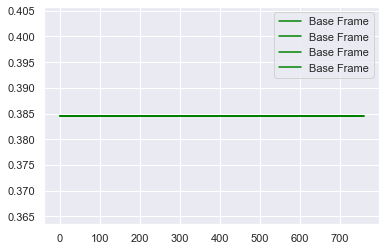

In [67]:
# check differences
figN = 1
for i in ['500Pose.bag', '1000Pose.bag', '3000Pose.bag', '5000Pose.bag']:
    b = bagreader(i)
#     b.topic_table
    data = b.message_by_topic('/recorded_force_no_vertical')
    
    Expert = pd.read_csv(data)

    index = 2
#     plt.figure(figsize=(16,8))
#     plt.subplot(4,1,figN)
    figN+=1
    plt.plot(Expert['pose.position.z'], label='Base Frame', color='green')
#     plt.plot(-Expert['pose.position.z'], label='Stifness Frame', color='steelblue')
    plt.legend()


In [38]:
data = b.message_by_topic('/franka_state_controller/franka_states')
pd.read_csv(data).columns


Index(['Time', 'header.seq', 'header.stamp.secs', 'header.stamp.nsecs',
       'header.frame_id', 'cartesian_collision_0', 'cartesian_collision_1',
       'cartesian_collision_2', 'cartesian_collision_3',
       'cartesian_collision_4',
       ...
       'last_motion_errors.cartesian_motion_generator_joint_acceleration_discontinuity',
       'last_motion_errors.cartesian_position_motion_generator_invalid_frame',
       'last_motion_errors.force_controller_desired_force_tolerance_violation',
       'last_motion_errors.controller_torque_discontinuity',
       'last_motion_errors.start_elbow_sign_inconsistent',
       'last_motion_errors.communication_constraints_violation',
       'last_motion_errors.power_limit_violation',
       'last_motion_errors.joint_p2p_insufficient_torque_for_planning',
       'last_motion_errors.tau_j_range_violation',
       'last_motion_errors.instability_detected'],
      dtype='object', length=342)


[INFO]  Data folder 500Pose already exists. Not creating.
[INFO]  Data folder 1000Pose already exists. Not creating.
[INFO]  Data folder 3000Pose already exists. Not creating.
[INFO]  Data folder 5000Pose already exists. Not creating.


Text(0.5, 1.0, 'Force (N)')

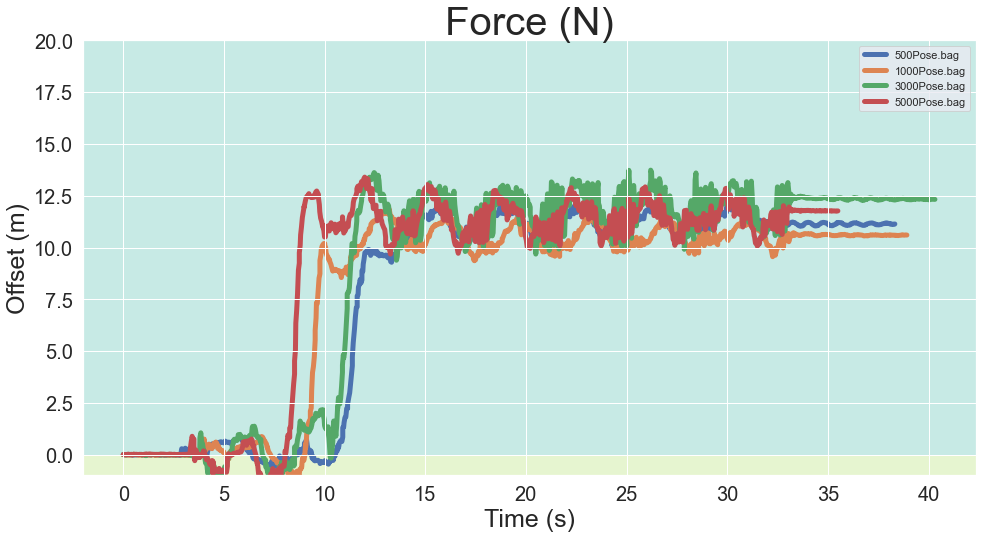

In [61]:
sns.set()

plt.figure(figsize=(16,8))
plt.tick_params(axis="both", labelsize=20)
# plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')

for i in ['500Pose.bag', '1000Pose.bag', '3000Pose.bag', '5000Pose.bag']:
    b = bagreader(i)
    data = b.message_by_topic('/franka_state_controller/franka_states')
    
    Expert = pd.read_csv(data)


# Expert['background'] = 'C0'
# Expert.loc[Expert['O_F_ext_hat_K_2'] >= 0, 'background'] = 'C1'
    Expert["Time"] -=Expert["Time"][0]
# Expert["reversedz"] = -Expert["O_F_ext_hat_K_2"]
    Expert["reversedz"] = Expert["O_F_ext_hat_K_2"]
    Expert["reversedz"] -= Expert["O_F_ext_hat_K_2"][0]

    ax = sns.lineplot(x="Time", y="reversedz", data=Expert, linewidth = 5, label = i)

ax.grid(True, zorder = 0)
ax.axhspan(0, 40, facecolor=BrBG[9][3])
ax.axhspan(-40, 0, facecolor=PiYG[9][3])
ax.set_xlabel('Time (s)', fontsize = 25)
ax.set_ylabel('Offset (m)', fontsize = 25)

ax.set_axisbelow(False)
# ranges = Expert.groupby('background')['header.seq'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
sns.set()
plt.ylim(-1, 20)
# plt.xlim(-5, 40)
plt.title('Force (N)', fontsize = 40)
# plt.legend()


[INFO]  Data folder 500Pose already exists. Not creating.
[INFO]  Data folder 1000Pose already exists. Not creating.
[INFO]  Data folder 3000Pose already exists. Not creating.
[INFO]  Data folder 5000Pose already exists. Not creating.


Text(0.5, 1.0, 'Offset (m)')

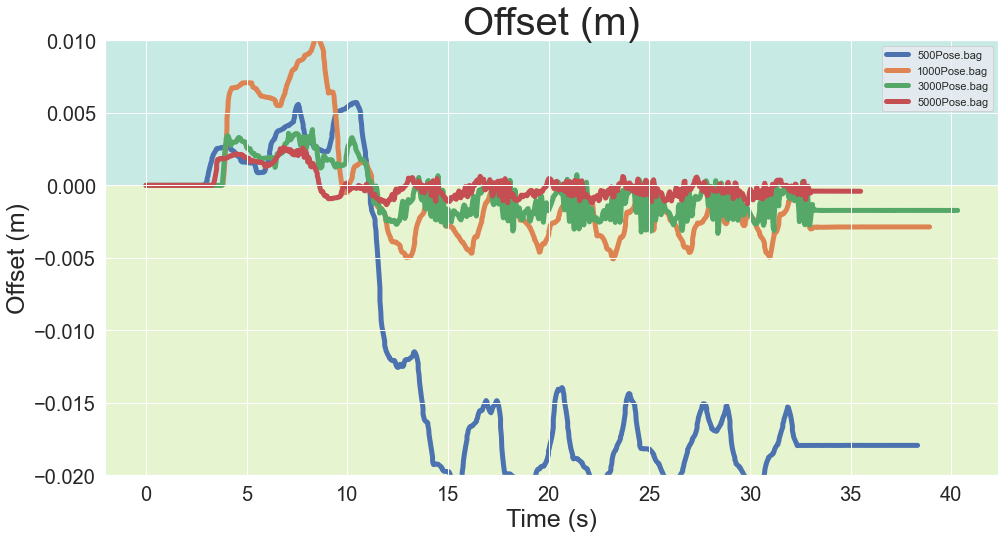

In [58]:
sns.set()

plt.figure(figsize=(16,8))
plt.tick_params(axis="both", labelsize=20)
# plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')

for i in ['500Pose.bag', '1000Pose.bag', '3000Pose.bag', '5000Pose.bag']:
    b = bagreader(i)
    data = b.message_by_topic('/franka_state_controller/franka_states')
    
    Expert = pd.read_csv(data)


# Expert['background'] = 'C0'
# Expert.loc[Expert['O_F_ext_hat_K_2'] >= 0, 'background'] = 'C1'
    Expert["Time"] -=Expert["Time"][0]
# Expert["reversedz"] = -Expert["O_F_ext_hat_K_2"]
    Expert["reversedz"] = Expert["O_T_EE_14"]
    Expert["reversedz"] -= Expert["O_T_EE_14"][0]

    ax = sns.lineplot(x="Time", y="reversedz", data=Expert, linewidth = 5, label = i)

ax.grid(True, zorder = 0)
ax.axhspan(0, 40, facecolor=BrBG[9][3])
ax.axhspan(-40, 0, facecolor=PiYG[9][3])
ax.set_xlabel('Time (s)', fontsize = 25)
ax.set_ylabel('Offset (m)', fontsize = 25)

ax.set_axisbelow(False)
# ranges = Expert.groupby('background')['header.seq'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
sns.set()

plt.ylim(-0.02, 0.01)
# plt.xlim(-5, 40)
plt.title('Offset (m)', fontsize = 40)
# plt.legend()


In [54]:
0.0023*5000

11.5

In [52]:
0.014*500

7.0

[INFO]  Data folder 0627/Rosbag/10-50Beam already exists. Not creating.


Text(0.5, 1.0, 'Force (N)')

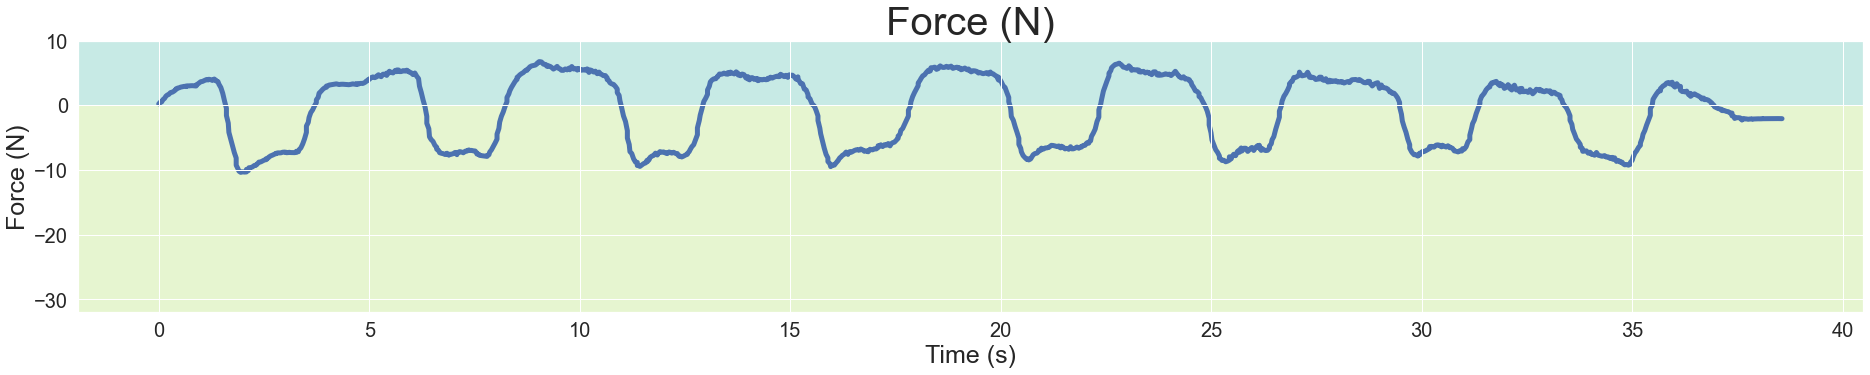

In [19]:

b = bagreader('500stiff.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()

plt.figure(figsize=(32,5))
plt.tick_params(axis="both", labelsize=20)
# plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')

Expert['background'] = 'C0'
Expert.loc[Expert['O_F_ext_hat_K_2'] >= 0, 'background'] = 'C1'
Expert["Time"] -=Expert["Time"][0]
Expert["reversedz"] = -Expert["O_F_ext_hat_K_2"]


ax = sns.lineplot(x="Time", y="reversedz", data=Expert, linewidth = 5)
ax.grid(True, zorder = 0)
ax.axhspan(0, 40, facecolor=BrBG[9][3])
ax.axhspan(-40, 0, facecolor=PiYG[9][3])
ax.set_xlabel('Time (s)', fontsize = 25)
ax.set_ylabel('Force (N)', fontsize = 25)

ax.set_axisbelow(False)
# ranges = Expert.groupby('background')['header.seq'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
sns.set()

plt.ylim(-32, 10)
# plt.xlim(-5, 40)
plt.title('Force (N)', fontsize = 40)
# plt.legend()

[INFO]  Successfully created the data folder 0603/ros_bag/5.


Text(0.5, 1.0, 'Force (N)')

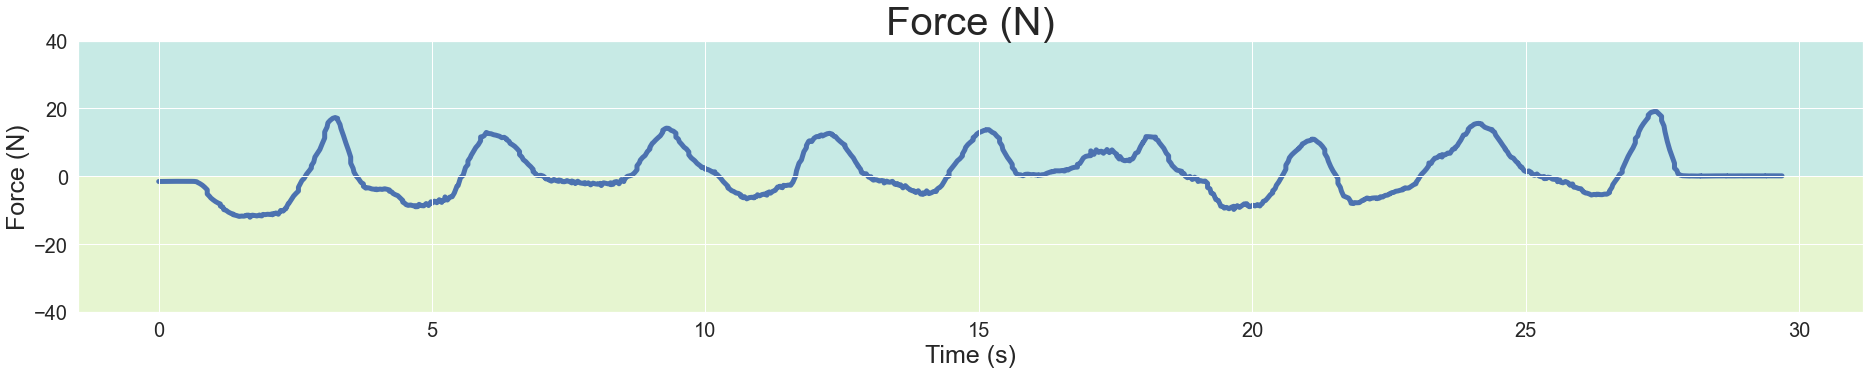

In [48]:
from bokeh.palettes import BrBG, PiYG, RdGy, RdYlGn, YlGnBu
b = bagreader('0603/ros_bag/5.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()

plt.figure(figsize=(32,5))
plt.tick_params(axis="both", labelsize=20)
# plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')

Expert['background'] = 'C0'
Expert.loc[Expert['O_F_ext_hat_K_2'] >= 0, 'background'] = 'C1'
Expert["Time"] -=Expert["Time"][0]
Expert["reversedz"] = -Expert["O_F_ext_hat_K_2"]


ax = sns.lineplot(x="Time", y="reversedz", data=Expert, linewidth = 5)
ax.grid(True, zorder = 0)
ax.axhspan(0, 40, facecolor=BrBG[9][3])
ax.axhspan(-40, 0, facecolor=PiYG[9][3])
ax.set_xlabel('Time (s)', fontsize = 25)
ax.set_ylabel('Force (N)', fontsize = 25)

ax.set_axisbelow(False)
# ranges = Expert.groupby('background')['header.seq'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
sns.set()

plt.ylim(-40, 40)
plt.title('Force (N)', fontsize = 40)
# plt.legend()

In [37]:
import rosbag
from sensor_msgs.msg import Joy
from geometry_msgs.msg import PoseStamped
# bag modification

firstMsg = True
height = 0
with rosbag.Bag('0627/Rosbag/10-50Beam-Ros.bag', 'w') as outbag:
    for topic, msg, t in rosbag.Bag('0627/Rosbag/10-50Beam.bag').read_messages():
        # This also replaces tf timestamps under the assumption 
         # that all transforms in the message share the same timestamp
        if topic == "/joint_states":
            outbag.write("/desired_joint_states", msg, t)
        elif topic == '/CurrentMotion':
            outbag.write(topic, msg, t)
        elif topic == '/recorded_trajectory':
            outbag.write(topic, msg, t)
            if firstMsg:
                height = msg.pose.position.z
                firstMsg = False
            
            posedata = msg
            
            posedata.pose.position.z = height
            outbag.write('/recorded_force_no_vertical', posedata, t)
        elif topic ==  '/reversed_force':
            outbag.write(topic, msg, t)
            
            forcearray = np.zeros(6)
            forcearray[0] = -msg.wrench.force.x
            forcearray[1] = -msg.wrench.force.y
            forcearray[2] = -msg.wrench.force.z
            forcearray[3] = -msg.wrench.torque.x
            forcearray[4] = -msg.wrench.torque.y
            forcearray[5] = -msg.wrench.torque.z
            
            joydata = Joy()
            joydata.axes = forcearray
            outbag.write('/recorded_force', joydata, t)


In [34]:
b = bagreader('0627/Rosbag/28-35Beam-Ros.bag')
data = b.message_by_topic('/recorded_force_no_vertical')
Expert = pd.read_csv(data)

[INFO]  Data folder 0627/Rosbag/28-35Beam-Ros already exists. Not creating.


Topics                        Types  Message Count  \
0               /CurrentMotion              sensor_msgs/Joy            888   
1        /desired_joint_states       sensor_msgs/JointState           1058   
2              /recorded_force              sensor_msgs/Joy            888   
3  /recorded_force_no_vertical    geometry_msgs/PoseStamped            889   
4         /recorded_trajectory    geometry_msgs/PoseStamped            889   
5              /reversed_force  geometry_msgs/WrenchStamped            888   

   Frequency  
0  22.767043  
1  30.008829  
2  22.775697  
3  22.758766  
4  22.758766  
5  22.775697

In [72]:
b = bagreader('0603/ros_bag/out.bag')
b.topic_table

[INFO]  Data folder 0603/ros_bag/out already exists. Not creating.


Topics                        Types  Message Count  \
0         /CurrentMotion              sensor_msgs/Joy            749   
1  /desired_joint_states       sensor_msgs/JointState            892   
2        /recorded_force              sensor_msgs/Joy            749   
3   /recorded_trajectory    geometry_msgs/PoseStamped            750   
4        /reversed_force  geometry_msgs/WrenchStamped            749   

   Frequency  
0  22.750927  
1  30.000672  
2  22.760186  
3  22.744203  
4  22.760186

In [28]:
b = bagreader('0603/ros_bag/Motion-0-16-22-09.bag')
b.topic_table

[INFO]  Data folder 0603/ros_bag/Motion-0-16-22-09 already exists. Not creating.


Topics  \
0                                          /UserForce   
1                                  /contact_direction   
2                                   /default_ext_load   
3   /dynamic_reconfigure_compliance_param_node/par...   
4   /dynamic_reconfigure_compliance_param_node/par...   
5                                   /equilibrium_pose   
6                     /equilibrium_pose_marker/update   
7                /equilibrium_pose_marker/update_full   
8                 /franka_control/error_recovery/goal   
9               /franka_control/error_recovery/result   
10              /franka_control/error_recovery/status   
11                     /franka_state_controller/F_ext   
12             /franka_state_controller/franka_states   
13              /franka_state_controller/joint_states   
14      /franka_state_controller/joint_states_desired   
15                                      /joint_states   
16                              /joint_states_desired   
17                                            /rosout   
18                                        /rosout_agg   
19                                                /tf   
20                                         /tf_static   

                                         Types  Message Count   Frequency  
0                              sensor_msgs/Joy            777   22.759877  
1                              sensor_msgs/Joy            776   22.760124  
2                              sensor_msgs/Joy            905   29.419777  
3        dynamic_reconfigure/ConfigDescription              1         NaN  
4                   dynamic_reconfigure/Config              1         NaN  
5                    geometry_msgs/PoseStamped           6164  200.167223  
6   visualization_msgs/InteractiveMarkerUpdate             61    2.000115  
7     visualization_msgs/InteractiveMarkerInit              1         NaN  
8       franka_control/ErrorRecoveryActionGoal            776   22.754074  
9        franka_msgs/ErrorRecoveryActionResult            777   22.788628  
10              actionlib_msgs/GoalStatusArray           1707  481.412224  
11                 geometry_msgs/WrenchStamped            905   29.420189  
12                     franka_msgs/FrankaState            905   22.739394  
13                      sensor_msgs/JointState            905   29.427104  
14                      sensor_msgs/JointState            905   29.416578  
15                      sensor_msgs/JointState            924   30.004321  
16                      sensor_msgs/JointState            925   30.002818  
17                           rosgraph_msgs/Log            788   22.735327  
18                           rosgraph_msgs/Log            776   22.733232  
19                          tf2_msgs/TFMessage           1829   61.860154  
20                          tf2_msgs/TFMessage              1         NaN

In [18]:
data = b.message_by_topic('/franka_state_controller/franka_states')
standard = pd.read_csv(data)
for i in standard.columns:
    print(i)

Time
header.seq
header.stamp.secs
header.stamp.nsecs
header.frame_id
cartesian_collision_0
cartesian_collision_1
cartesian_collision_2
cartesian_collision_3
cartesian_collision_4
cartesian_collision_5
cartesian_contact_0
cartesian_contact_1
cartesian_contact_2
cartesian_contact_3
cartesian_contact_4
cartesian_contact_5
q_0
q_1
q_2
q_3
q_4
q_5
q_6
q_d_0
q_d_1
q_d_2
q_d_3
q_d_4
q_d_5
q_d_6
dq_0
dq_1
dq_2
dq_3
dq_4
dq_5
dq_6
dq_d_0
dq_d_1
dq_d_2
dq_d_3
dq_d_4
dq_d_5
dq_d_6
ddq_d_0
ddq_d_1
ddq_d_2
ddq_d_3
ddq_d_4
ddq_d_5
ddq_d_6
theta_0
theta_1
theta_2
theta_3
theta_4
theta_5
theta_6
dtheta_0
dtheta_1
dtheta_2
dtheta_3
dtheta_4
dtheta_5
dtheta_6
tau_J_0
tau_J_1
tau_J_2
tau_J_3
tau_J_4
tau_J_5
tau_J_6
dtau_J_0
dtau_J_1
dtau_J_2
dtau_J_3
dtau_J_4
dtau_J_5
dtau_J_6
tau_J_d_0
tau_J_d_1
tau_J_d_2
tau_J_d_3
tau_J_d_4
tau_J_d_5
tau_J_d_6
K_F_ext_hat_K_0
K_F_ext_hat_K_1
K_F_ext_hat_K_2
K_F_ext_hat_K_3
K_F_ext_hat_K_4
K_F_ext_hat_K_5
elbow_0
elbow_1
elbow_d_0
elbow_d_1
elbow_c_0
elbow_c_1
delbow_c_

In [75]:
# for i in range(6):
#     plt.plot(eval('standard.K_F_ext_hat_K_'+str(i)))

In [76]:
# plt.plot(standard.O_F_ext_hat_K_2, label='Base Frame', color='green')
# plt.plot(standard.K_F_ext_hat_K_2, label='Stifness Frame', color='steelblue')
# plt.plot(standard.K_F_ext_hat_K_2 + standard.O_F_ext_hat_K_2, label='Difference', color='grey')
# plt.legend()

[INFO]  Data folder 500Pose already exists. Not creating.
[INFO]  Data folder 1000Pose already exists. Not creating.
[INFO]  Data folder 3000Pose already exists. Not creating.
[INFO]  Data folder 5000Pose already exists. Not creating.


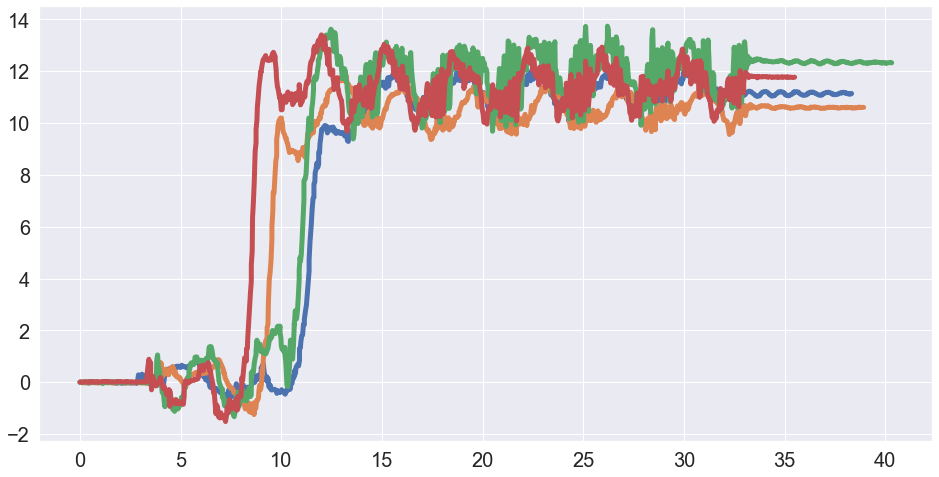

In [68]:

plt.figure(figsize=(16,8))
plt.tick_params(axis="both", labelsize=20)
# plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')

for i in ['500Pose.bag', '1000Pose.bag', '3000Pose.bag', '5000Pose.bag']:
    b = bagreader(i)
    data = b.message_by_topic('/franka_state_controller/franka_states')
    
    Expert = pd.read_csv(data)


# Expert['background'] = 'C0'
# Expert.loc[Expert['O_F_ext_hat_K_2'] >= 0, 'background'] = 'C1'
    Expert["Time"] -=Expert["Time"][0]
# Expert["reversedz"] = -Expert["O_F_ext_hat_K_2"]
    Expert["reversedz"] = Expert["O_F_ext_hat_K_2"]
    Expert["reversedz"] -= Expert["O_F_ext_hat_K_2"][0]

    ax = plt.plot(Expert["Time"], Expert["reversedz"], linewidth = 5, label = i)

[INFO]  Data folder Expert_Helix already exists. Not creating.


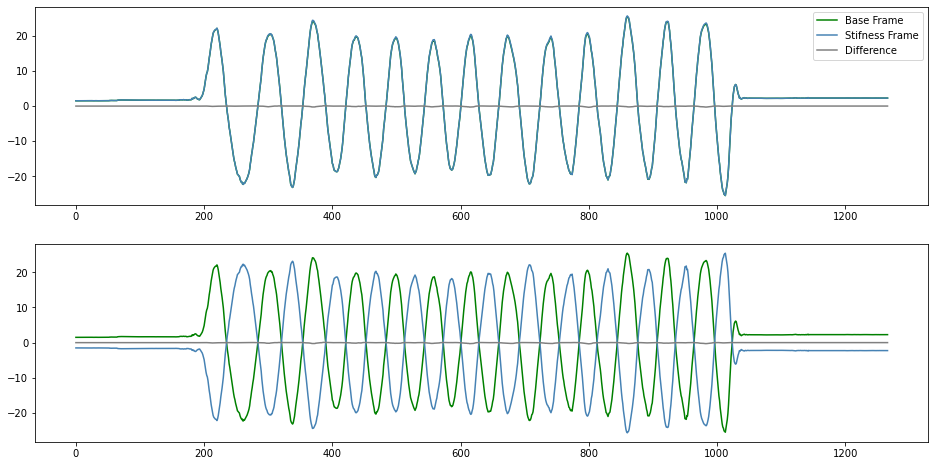

In [23]:
# check differences

b = bagreader('Expert_Helix.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
standard = pd.read_csv(data)

index = 2
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.plot(standard.eval('O_F_ext_hat_K_'+str(index)), label='Base Frame', color='green')
plt.plot(-standard.eval('K_F_ext_hat_K_'+str(index)), label='Stifness Frame', color='steelblue')
plt.plot(standard.eval('O_F_ext_hat_K_'+str(index)) + standard.eval('K_F_ext_hat_K_'+str(index)), label='Difference', color='grey')
plt.legend()

plt.subplot(2,1,2)
plt.plot(standard.eval('O_F_ext_hat_K_'+str(index)), label='Base Frame', color='green')
plt.plot(standard.eval('K_F_ext_hat_K_'+str(index)), label='Stifness Frame', color='steelblue')
plt.plot(standard.eval('O_F_ext_hat_K_'+str(index)) + standard.eval('K_F_ext_hat_K_'+str(index)), label='Difference', color='grey')



[INFO]  Data folder Expert_Helix already exists. Not creating.


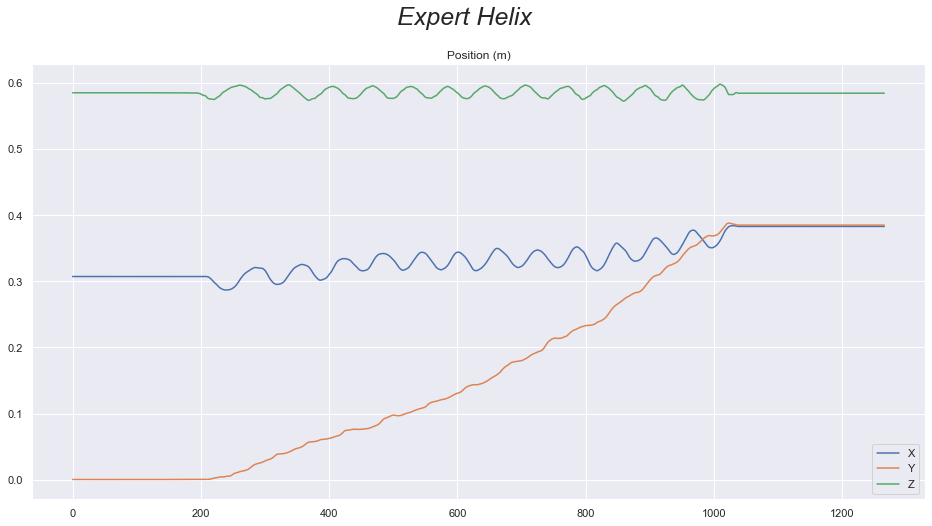

In [21]:
b = bagreader('Expert_Helix.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()

plt.figure(figsize=(16,8))

plt.suptitle('Expert Helix', fontsize=25, fontstyle='italic')
plt.subplot(1,1,1)
plt.plot(Expert.O_T_EE_12, label = 'X')
plt.plot(Expert.O_T_EE_13, label = 'Y')
plt.plot(Expert.O_T_EE_14, label = 'Z')
# plt.ylim(-30, 30)
plt.title('Position (m)')
plt.legend()


[INFO]  Data folder Expert_Zigzag already exists. Not creating.


Text(0.5, 1.0, 'Force (N)')

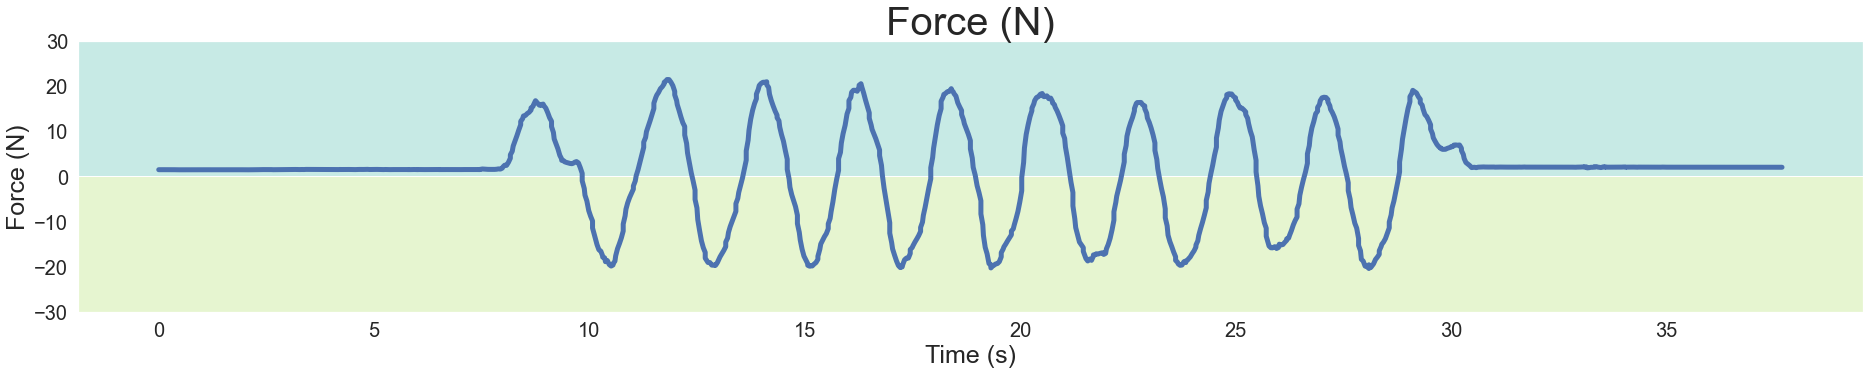

In [48]:
from bokeh.palettes import BrBG, PiYG, RdGy, RdYlGn, YlGnBu
b = bagreader('Expert_Zigzag.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()

plt.figure(figsize=(32,5))
plt.tick_params(axis="both", labelsize=20)
# plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')

Expert['background'] = 'C0'
Expert.loc[Expert['O_F_ext_hat_K_2'] >= 0, 'background'] = 'C1'
Expert["Time"] -=Expert["Time"][0]

ax = sns.lineplot(x="Time", y="O_F_ext_hat_K_2", data=Expert, linewidth = 5)
ax.axhspan(0, 35, facecolor=BrBG[9][3])
ax.axhspan(-35, 0, facecolor=PiYG[9][3])
ax.set_xlabel('Time (s)', fontsize = 25)
ax.set_ylabel('Force (N)', fontsize = 25)
# ranges = Expert.groupby('background')['header.seq'].agg(['min', 'max'])
# for i, row in ranges.iterrows():
#     ax.axvspan(xmin=row['min'], xmax=row['max'], facecolor=i, alpha=0.3)
sns.set()

plt.ylim(-30, 30)
plt.title('Force (N)', fontsize = 40)
# plt.legend()

[INFO]  Data folder 1000Pose already exists. Not creating.


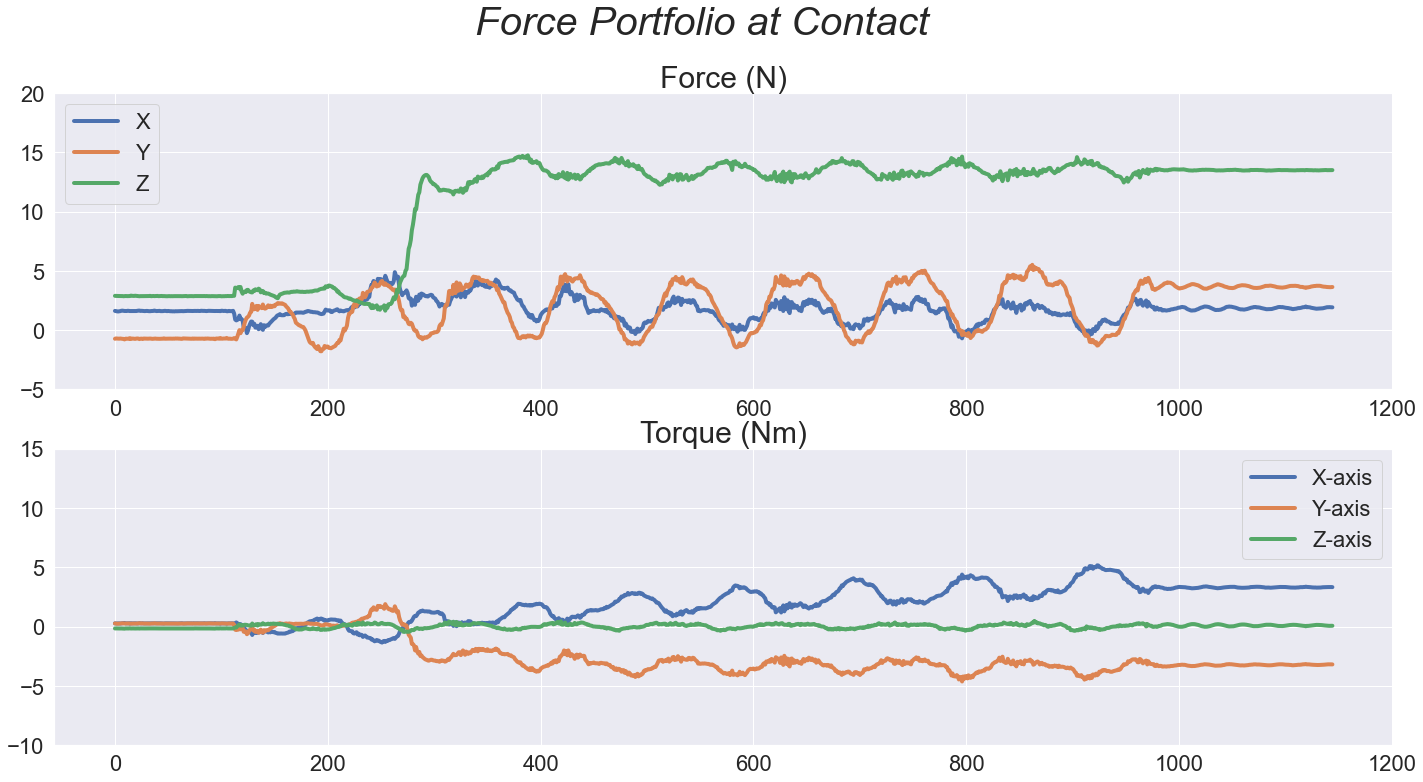

In [95]:
b = bagreader('1000Pose.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()
sns.set(font_scale = 2)
plt.figure(figsize=(24,12))

plt.suptitle('Force Portfolio at Contact', fontsize=40, fontstyle='italic')
plt.subplot(2,1,1)
plt.plot(Expert.O_F_ext_hat_K_0,linewidth=4, label = 'X',)
plt.plot(Expert.O_F_ext_hat_K_1,linewidth=4, label = 'Y')
plt.plot(Expert.O_F_ext_hat_K_2,linewidth=4, label = 'Z')
plt.ylim(-5, 20)
plt.title('Force (N)', fontsize=30)
plt.legend()

plt.subplot(2,1,2)
plt.plot(Expert.O_F_ext_hat_K_3, linewidth=4,label = 'X-axis')
plt.plot(Expert.O_F_ext_hat_K_4, linewidth=4,label = 'Y-axis')
plt.plot(Expert.O_F_ext_hat_K_5, linewidth=4,label = 'Z-axis')
plt.ylim(-10, 15)
plt.title('Torque (Nm)', fontsize=30)
plt.legend()

In [101]:
b = bagreader('3000Pose.bag')
b.topic_table

[INFO]  Data folder 3000Pose already exists. Not creating.


Topics  \
0                                      /CurrentMotion   
1                                          /UserForce   
2                                       /client_count   
3                                  /connected_clients   
4                                  /contact_direction   
5                                   /default_ext_load   
6                               /desired_joint_states   
7   /dynamic_reconfigure_compliance_param_node/par...   
8   /dynamic_reconfigure_compliance_param_node/par...   
9                                   /equilibrium_pose   
10                    /equilibrium_pose_marker/update   
11               /equilibrium_pose_marker/update_full   
12                /franka_control/error_recovery/goal   
13              /franka_control/error_recovery/result   
14              /franka_control/error_recovery/status   
15                     /franka_state_controller/F_ext   
16             /franka_state_controller/franka_states   
17              /franka_state_controller/joint_states   
18      /franka_state_controller/joint_states_desired   
19                                      /joint_states   
20                              /joint_states_desired   
21                                    /recorded_force   
22                        /recorded_force_no_vertical   
23                               /recorded_trajectory   
24                                    /reversed_force   
25                                            /rosout   
26                                        /rosout_agg   
27                                                /tf   
28                                         /tf_static   

                                         Types  Message Count   Frequency  
0                              sensor_msgs/Joy            761   22.782006  
1                              sensor_msgs/Joy           1017   22.800707  
2                               std_msgs/Int32              1         NaN  
3              rosbridge_msgs/ConnectedClients              1         NaN  
4                              sensor_msgs/Joy           1016   22.795750  
5                              sensor_msgs/Joy           1186   29.414309  
6                       sensor_msgs/JointState            906   30.000029  
7        dynamic_reconfigure/ConfigDescription              1         NaN  
8                   dynamic_reconfigure/Config              1         NaN  
9                    geometry_msgs/PoseStamped           8069  199.995422  
10  visualization_msgs/InteractiveMarkerUpdate             81    2.000203  
11    visualization_msgs/InteractiveMarkerInit              1         NaN  
12      franka_control/ErrorRecoveryActionGoal           1017   22.785533  
13       franka_msgs/ErrorRecoveryActionResult           1017   22.894235  
14              actionlib_msgs/GoalStatusArray           2235  341.277787  
15                 geometry_msgs/WrenchStamped           1186   29.412040  
16                     franka_msgs/FrankaState           1186   22.748891  
17                      sensor_msgs/JointState           1187   29.413278  
18                      sensor_msgs/JointState           1187   29.410700  
19                      sensor_msgs/JointState           1210   30.006038  
20                      sensor_msgs/JointState           1210   30.000887  
21                             sensor_msgs/Joy            761   22.800087  
22                   geometry_msgs/PoseStamped            762   22.777676  
23                   geometry_msgs/PoseStamped            762   22.768155  
24                 geometry_msgs/WrenchStamped            761   22.791600  
25                           rosgraph_msgs/Log           1041   22.742107  
26                           rosgraph_msgs/Log           1024   22.744203  
27                          tf2_msgs/TFMessage           2397   62.442185  
28                          tf2_msgs/TFMessage              1         NaN

[INFO]  Data folder 3000Pose already exists. Not creating.


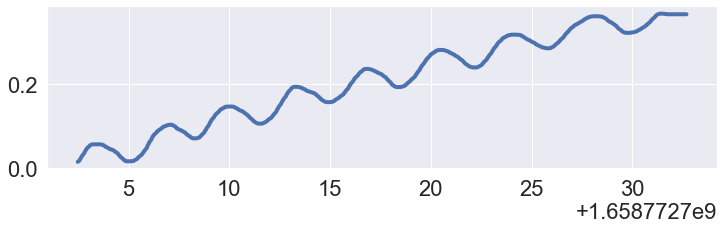

In [105]:
b = bagreader('3000Pose.bag')
data = b.message_by_topic('/recorded_force_no_vertical')
Expert = pd.read_csv(data)
plt.figure(figsize=(12,3))

plt.plot(Expert['Time'],Expert['pose.position.y'],linewidth=4, label = 'Y')

In [104]:
Expert

Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.658773e+09          27                  0                   0   
1    1.658773e+09          28                  0                   0   
2    1.658773e+09          29                  0                   0   
3    1.658773e+09          30                  0                   0   
4    1.658773e+09          31                  0                   0   
..            ...         ...                ...                 ...   
757  1.658773e+09         784                  0                   0   
758  1.658773e+09         785                  0                   0   
759  1.658773e+09         786                  0                   0   
760  1.658773e+09         787                  0                   0   
761  1.658773e+09         788                  0                   0   

     header.frame_id  pose.position.x  pose.position.y  pose.position.z  \
0                NaN         0.288318         0.014587         0.384604   
1                NaN         0.288232         0.016284         0.384604   
2                NaN         0.288136         0.018146         0.384604   
3                NaN         0.287951         0.022443         0.384604   
4                NaN         0.287887         0.024958         0.384604   
..               ...              ...              ...              ...   
757              NaN         0.298259         0.367440         0.384604   
758              NaN         0.298258         0.367440         0.384604   
759              NaN         0.298260         0.367438         0.384604   
760              NaN         0.298259         0.367440         0.384604   
761              NaN         0.298259         0.367441         0.384604   

     pose.orientation.x  pose.orientation.y  pose.orientation.z  \
0              0.928856           -0.370314           -0.008415   
1              0.929224           -0.369392           -0.008380   
2              0.929000           -0.369955           -0.008578   
3              0.928047           -0.372347           -0.008292   
4              0.928116           -0.372187           -0.007645   
..                  ...                 ...                 ...   
757            0.925763           -0.378040           -0.006668   
758            0.925765           -0.378035           -0.006668   
759            0.925764           -0.378039           -0.006668   
760            0.925765           -0.378036           -0.006668   
761            0.925764           -0.378038           -0.006667   

     pose.orientation.w  
0              0.004748  
1              0.004772  
2              0.004268  
3              0.004226  
4              0.004251  
..                  ...  
757            0.001926  
758            0.001926  
759            0.001926  
760            0.001924  
761            0.001923  

[762 rows x 12 columns]

[INFO]  Data folder 1000NewPose already exists. Not creating.


(0.365, 0.39)

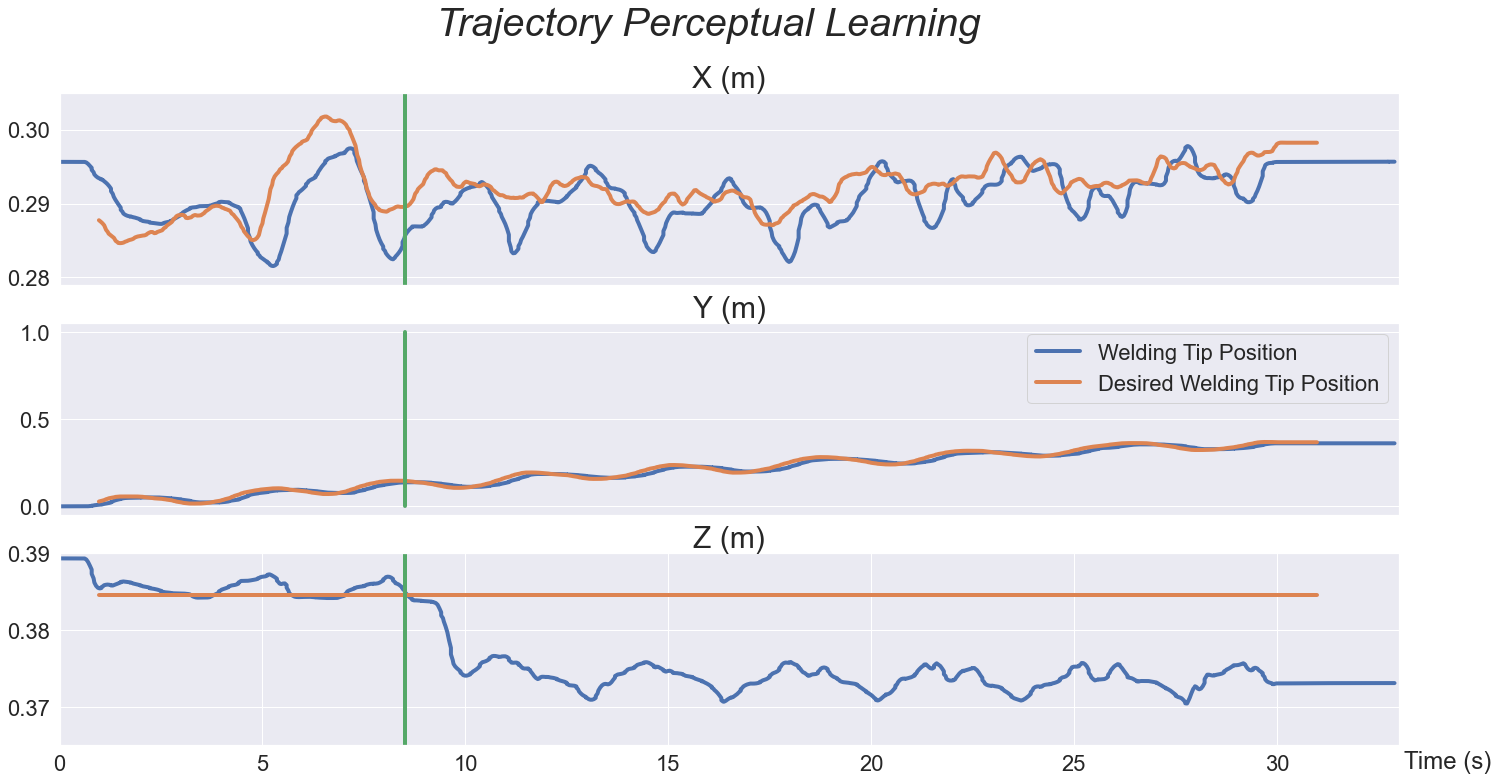

In [25]:
b = bagreader('1000NewPose.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Real = pd.read_csv(data)
Mark = Real['Time'][0]
Real['Time'] -= Real['Time'][0]
Real['Time'] -=2

data = b.message_by_topic('/recorded_force_no_vertical')
desired = pd.read_csv(data)
desired['Time'] -= Mark
desired['Time'] -= 2
# desired['pose.position.z'] += Real.O_T_EE_14.iloc[0] -desired['pose.position.z'].iloc[0] 


plt.figure(figsize=(24,12))
sns.set(font_scale = 2)

plt.suptitle('Trajectory Perceptual Learning', fontsize=40, fontstyle='italic')
plt.subplot(3,1,1)
plt.plot(Real['Time'],Real.O_T_EE_12,linewidth=4, label = 'Welding Tip Position')
plt.plot(desired['Time'],desired['pose.position.x'],linewidth=4, label = 'Desired Welding Tip Position')
plt.plot([8.5,8.5],[0,1], linewidth=4)
plt.xticks([])  
plt.title('X (m)', fontsize=30)

plt.xlim([0,33])
plt.ylim(0.279, 0.305)

plt.subplot(3,1,2)
plt.plot(Real['Time'],Real.O_T_EE_13,linewidth=4, label = 'Welding Tip Position')
plt.plot(desired['Time'],desired['pose.position.y'],linewidth=4, label = 'Desired Welding Tip Position')
plt.xticks([])  
plt.plot([8.5,8.5],[0,1], linewidth=4)
plt.legend()
plt.xlim([0,33])
plt.title('Y (m)', fontsize=30)
# plt.legend()
# plt.ylim(-0.025, 0.025)

plt.subplot(3,1,3)
plt.plot(Real['Time'],Real.O_T_EE_14,linewidth=4, label = 'Welding Tip Position')
plt.plot(desired['Time'],desired['pose.position.z'],linewidth=4, label = 'Desired Welding Tip Position')
# plt.xticks([])  
plt.plot([8.5,8.5],[0,1], linewidth=4)
plt.xlim([0,33])
plt.title('Z (m)', fontsize=30)
# plt.legend()
plt.annotate('Time (s)', xy=(1,0), xytext=(5, -5), ha='left', va='top',
            xycoords='axes fraction', textcoords='offset points')

plt.ylim(0.365, 0.390)


(17.0, 20.0)

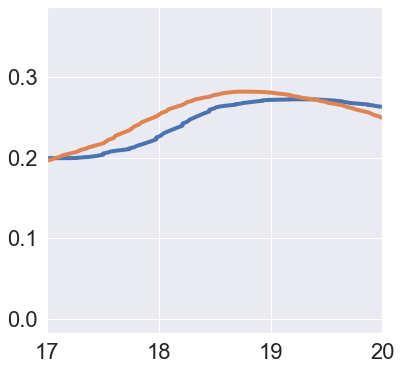

In [26]:
plt.figure(figsize=(6,6))

plt.plot(Real['Time'],Real.O_T_EE_13,linewidth=4, label = 'Welding Tip Position')
plt.plot(desired['Time'],desired['pose.position.y'],linewidth=4, label = 'Desired Welding Tip Position')
# plt.xticks([])  
# plt.title('Y (m)', fontsize=30)
plt.xlim(17, 20)

[INFO]  Data folder 3000Pose already exists. Not creating.


(0.35, 0.4)

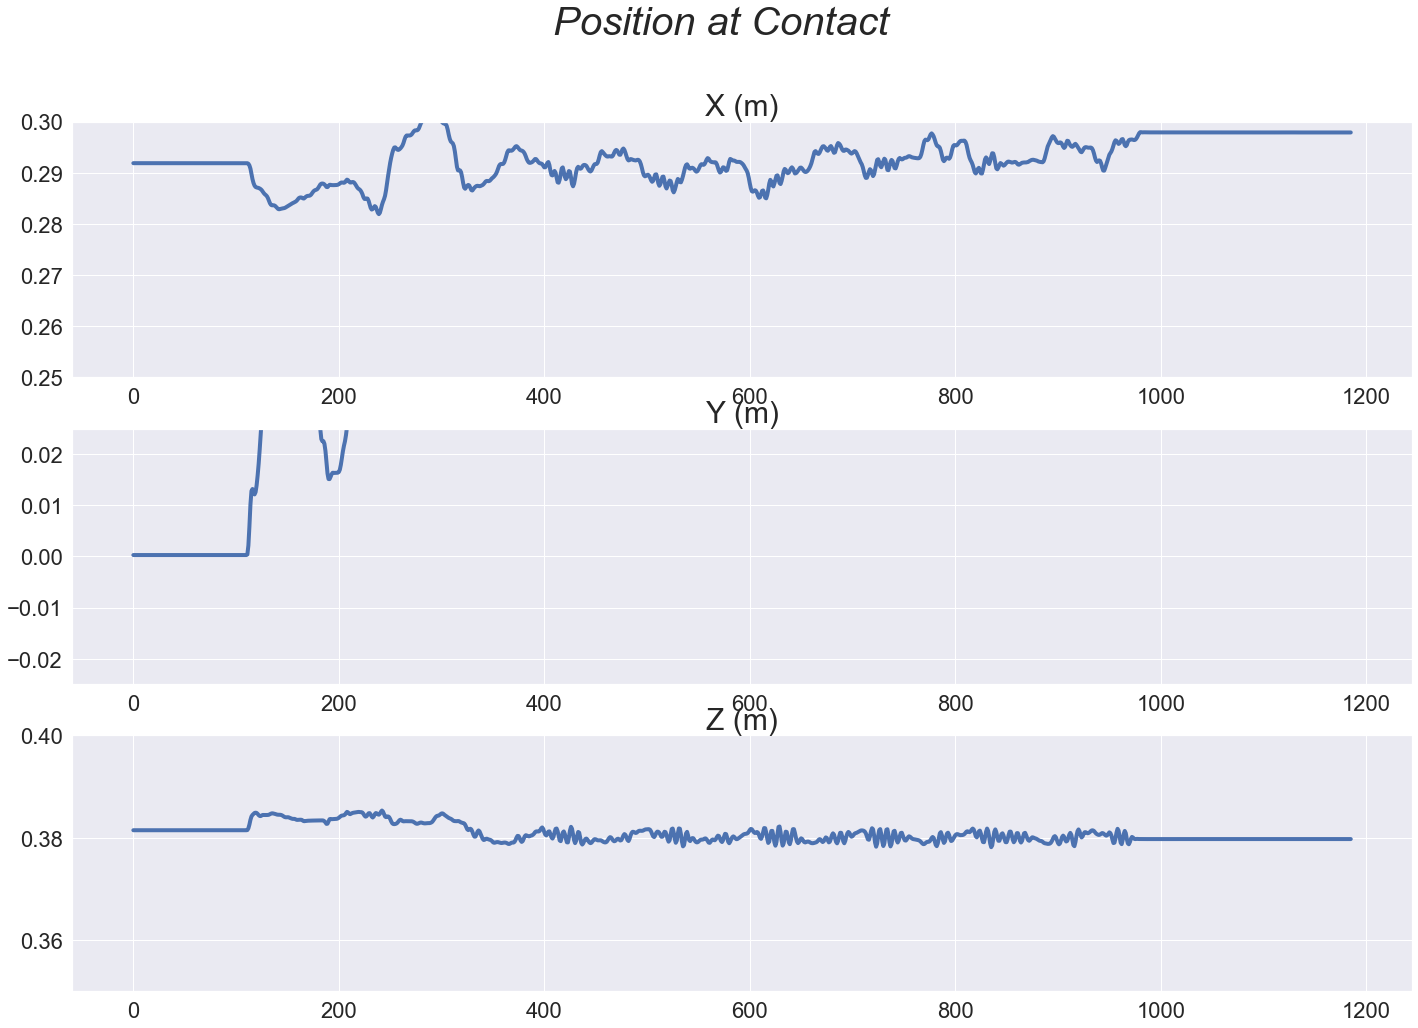

In [96]:
b = bagreader('3000Pose.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()
sns.set(font_scale = 2)
plt.figure(figsize=(24,16))

plt.suptitle('Position at Contact', fontsize=40, fontstyle='italic')
plt.subplot(3,1,1)
plt.plot(Expert.O_T_EE_12,linewidth=4)
plt.title('X (m)', fontsize=30)
plt.ylim(0.25, 0.3)

plt.subplot(3,1,2)
plt.plot(Expert.O_T_EE_13,linewidth=4, label = 'Y')
plt.title('Y (m)', fontsize=30)
plt.ylim(-0.025, 0.025)

plt.subplot(3,1,3)
plt.plot(Expert.O_T_EE_14,linewidth=4, label = 'Z')
plt.title('Z (m)', fontsize=30)
plt.ylim(0.35, 0.4)
# plt.ylim(-0.1, 20)
# plt.title('Force (N)', fontsize=30)
# plt.legend()




[INFO]  Data folder Expert_Helix already exists. Not creating.


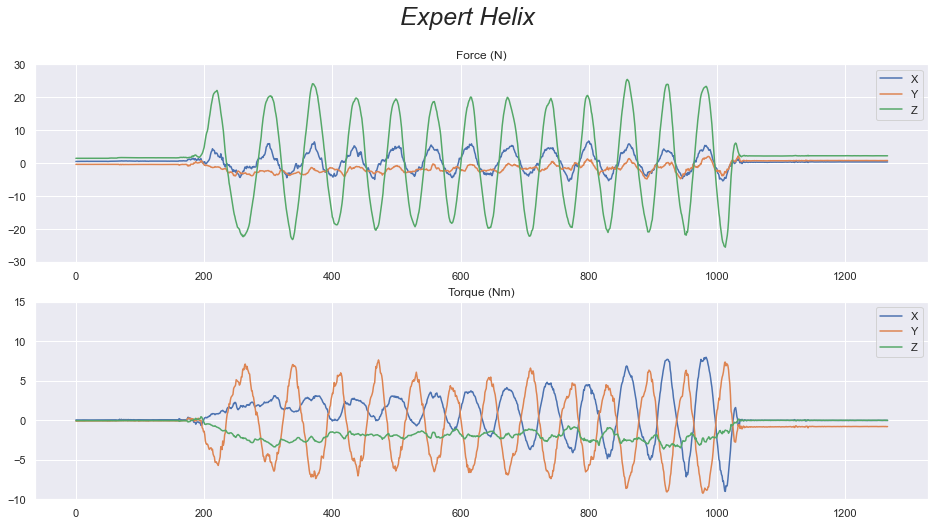

In [4]:
b = bagreader('Expert_Helix.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()

plt.figure(figsize=(16,8))

plt.suptitle('Expert Helix', fontsize=25, fontstyle='italic')
plt.subplot(2,1,1)
plt.plot(Expert.O_F_ext_hat_K_0, label = 'X')
plt.plot(Expert.O_F_ext_hat_K_1, label = 'Y')
plt.plot(Expert.O_F_ext_hat_K_2, label = 'Z')
plt.ylim(-30, 30)
plt.title('Force (N)')
plt.legend()

plt.subplot(2,1,2)
plt.plot(Expert.O_F_ext_hat_K_3, label = 'X')
plt.plot(Expert.O_F_ext_hat_K_4, label = 'Y')
plt.plot(Expert.O_F_ext_hat_K_5, label = 'Z')
plt.ylim(-10, 15)
plt.title('Torque (Nm)')
plt.legend()

In [ ]:
# look at user

[INFO]  Data folder User_Helix already exists. Not creating.


(10.0, 11.0)

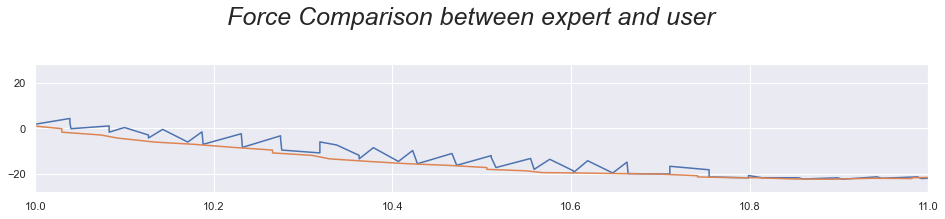

In [6]:
b = bagreader('User_Helix.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
standard = pd.read_csv(data)

sns.set()



plt.figure(figsize=(16,8))

plt.suptitle(' Force Comparison between expert and user', fontsize=25, fontstyle='italic')
plt.subplot(3,1,1)
d1 = Expert['Time']-Expert['Time'][0]
d2 = standard['Time']-standard['Time'][0]
plt.plot(d2, standard.O_F_ext_hat_K_2, label = 'User Z')
plt.plot(d1+2, Expert.O_F_ext_hat_K_2, label = 'Expert Z')
plt.xlim(10,11)


[INFO]  Data folder 0530/0530Test already exists. Not creating.
[INFO]  Data folder 0530/0530ReplayTest already exists. Not creating.


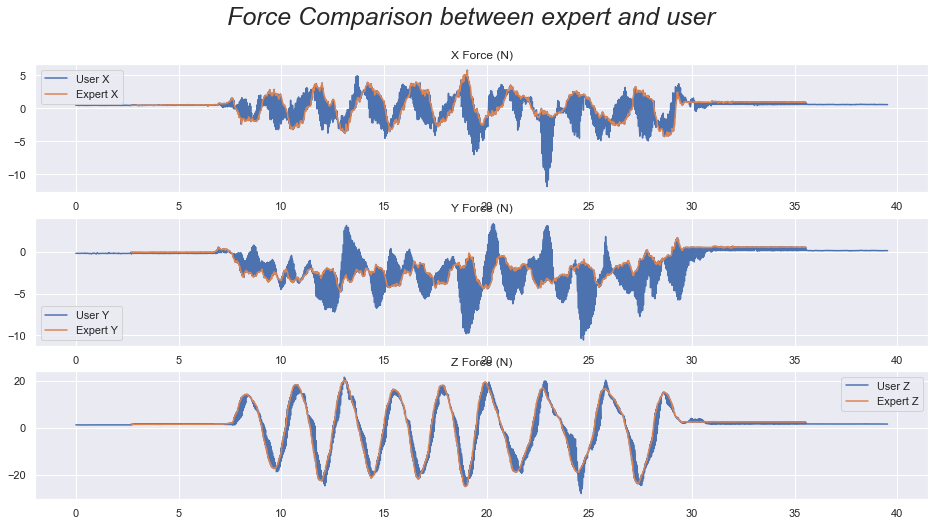

In [14]:
b = bagreader('0530/0530Test.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

b = bagreader('0530/0530ReplayTest.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
User = pd.read_csv(data)


sns.set()



plt.figure(figsize=(16,8))

plt.suptitle(' Force Comparison between expert and user', fontsize=25, fontstyle='italic')
plt.subplot(3,1,1)
d1 = Expert['Time']-Expert['Time'][0] + 2.7
d2 = User['Time']-User['Time'][0]


plt.plot(d2, User.O_F_ext_hat_K_0, label = 'User X')
plt.plot(d1, Expert.O_F_ext_hat_K_0, label = 'Expert X')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('X Force (N)')
plt.legend()

plt.subplot(3,1,2)
# plt.suptitle(' Force in Y', fontsize=25, fontstyle='italic')
plt.plot(d2, User.O_F_ext_hat_K_1, label = 'User Y')
plt.plot(d1, Expert.O_F_ext_hat_K_1, label = 'Expert Y')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Y Force (N)')
plt.legend()


plt.subplot(3,1,3)
# plt.suptitle(' Force in Z', fontsize=25, fontstyle='italic')
plt.plot(d2, User.O_F_ext_hat_K_2, label = 'User Z')
plt.plot(d1, Expert.O_F_ext_hat_K_2, label = 'Expert Z')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Z Force (N)')
plt.legend()

# plt.subplot(2,1,2)
# # plt.plot(standard.O_F_ext_hat_K_3, label = 'X')
# # plt.plot(standard.O_F_ext_hat_K_4, label = 'Y')
# # plt.plot(standard.O_F_ext_hat_K_5, label = 'Z')
# plt.ylim(-10, 15)
# plt.title('Torque (Nm)')
# plt.legend()

[INFO]  Data folder 0530/0530Test already exists. Not creating.
[INFO]  Data folder 0530/0530ReplayTest already exists. Not creating.


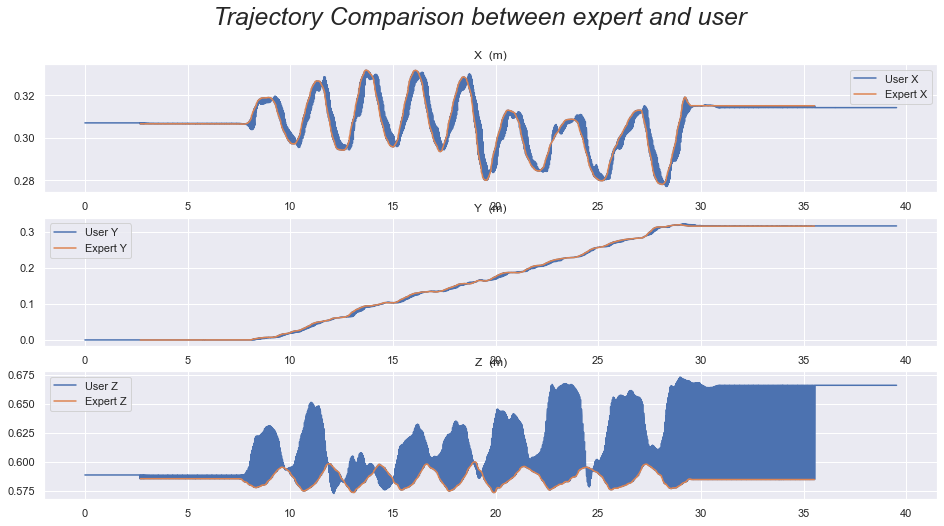

In [16]:
b = bagreader('0530/0530Test.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

b = bagreader('0530/0530ReplayTest.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
User = pd.read_csv(data)


sns.set()



plt.figure(figsize=(16,8))

plt.suptitle(' Trajectory Comparison between expert and user', fontsize=25, fontstyle='italic')
plt.subplot(3,1,1)


d1 = Expert['Time']-Expert['Time'][0] + 2.7
d2 = User['Time']-User['Time'][0]
plt.plot(d2, User.O_T_EE_12, label = 'User X')
plt.plot(d1, Expert.O_T_EE_12, label = 'Expert X')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('X  (m)')
plt.legend()

plt.subplot(3,1,2)
# plt.suptitle(' Force in Y', fontsize=25, fontstyle='italic')
plt.plot(d2, User.O_T_EE_13, label = 'User Y')
plt.plot(d1, Expert.O_T_EE_13, label = 'Expert Y')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Y  (m)')
plt.legend()


plt.subplot(3,1,3)
# plt.suptitle(' Force in Z', fontsize=25, fontstyle='italic')
plt.plot(d2, User.O_T_EE_14, label = 'User Z')
plt.plot(d1, Expert.O_T_EE_14, label = 'Expert Z')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Z  (m)')
plt.legend()

# plt.subplot(2,1,2)
# # plt.plot(standard.O_F_ext_hat_K_3, label = 'X')
# # plt.plot(standard.O_F_ext_hat_K_4, label = 'Y')
# # plt.plot(standard.O_F_ext_hat_K_5, label = 'Z')
# plt.ylim(-10, 15)
# plt.title('Torque (Nm)')
# plt.legend()

In [80]:
bagreader('0530/0530ReplayTest.bag').topic_table

[INFO]  Data folder 0530/0530ReplayTest already exists. Not creating.


Topics  \
0                                          /UserForce   
1                                       /client_count   
2                                  /connected_clients   
3                                  /contact_direction   
4                                   /default_ext_load   
5   /dynamic_reconfigure_compliance_param_node/par...   
6   /dynamic_reconfigure_compliance_param_node/par...   
7   /dynamic_reconfigure_desired_mass_param_node/p...   
8   /dynamic_reconfigure_desired_mass_param_node/p...   
9                                   /equilibrium_pose   
10                    /equilibrium_pose_marker/update   
11               /equilibrium_pose_marker/update_full   
12                /franka_control/error_recovery/goal   
13              /franka_control/error_recovery/result   
14              /franka_control/error_recovery/status   
15                     /franka_state_controller/F_ext   
16             /franka_state_controller/franka_states   
17              /franka_state_controller/joint_states   
18      /franka_state_controller/joint_states_desired   
19                                      /joint_states   
20                              /joint_states_desired   
21                               /recorded_trajectory   
22                                    /reversed_force   
23                                            /rosout   
24                                        /rosout_agg   
25                                                /tf   
26                                         /tf_static   

                                         Types  Message Count     Frequency  
0                              sensor_msgs/Joy           2656     88.886854  
1                               std_msgs/Int32              2      0.373515  
2              rosbridge_msgs/ConnectedClients              2      0.373377  
3                              sensor_msgs/Joy           2653     88.328100  
4                              sensor_msgs/Joy           3096     81.515606  
5        dynamic_reconfigure/ConfigDescription              2      0.373506  
6                   dynamic_reconfigure/Config              2      0.373369  
7        dynamic_reconfigure/ConfigDescription              1           NaN  
8                   dynamic_reconfigure/Config              1           NaN  
9                    geometry_msgs/PoseStamped          14494    281.383604  
10  visualization_msgs/InteractiveMarkerUpdate            145      3.140372  
11    visualization_msgs/InteractiveMarkerInit              2      0.373516  
12      franka_control/ErrorRecoveryActionGoal           2655     87.701994  
13       franka_msgs/ErrorRecoveryActionResult           3485    152.528465  
14              actionlib_msgs/GoalStatusArray           7235    570.847771  
15                 geometry_msgs/WrenchStamped           2130     55.284959  
16                     franka_msgs/FrankaState           2126     57.928375  
17                      sensor_msgs/JointState           2130     55.569152  
18                      sensor_msgs/JointState           2129     55.299537  
19                      sensor_msgs/JointState           2174     54.251656  
20                      sensor_msgs/JointState           2175     32.500380  
21                   geometry_msgs/PoseStamped            821     22.768897  
22                 geometry_msgs/WrenchStamped            821     22.775202  
23                           rosgraph_msgs/Log           3431    902.291922  
24                           rosgraph_msgs/Log           4242  20360.699029  
25                          tf2_msgs/TFMessage           4306    141.732977  
26                          tf2_msgs/TFMessage              2      0.373512

In [85]:
b = bagreader('0530/0530ReplayTest.bag')
data = b.message_by_topic('/reversed_force')
User = pd.read_csv(data)
d2 = (User.Time -User.Time[0])*1e10
User

[INFO]  Data folder 0530/0530ReplayTest already exists. Not creating.


Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.653925e+09           9                  0                   0   
1    1.653925e+09          10                  0                   0   
2    1.653925e+09          11                  0                   0   
3    1.653925e+09          12                  0                   0   
4    1.653925e+09          13                  0                   0   
..            ...         ...                ...                 ...   
816  1.653925e+09         825                  0                   0   
817  1.653925e+09         826                  0                   0   
818  1.653925e+09         827                  0                   0   
819  1.653925e+09         828                  0                   0   
820  1.653925e+09         829                  0                   0   

    header.frame_id  wrench.force.x  wrench.force.y  wrench.force.z  \
0       panda_link0        0.490055       -0.049824        1.542636   
1       panda_link0        0.487190       -0.052107        1.537230   
2       panda_link0        0.466715       -0.050213        1.531326   
3       panda_link0        0.477501       -0.060764        1.533121   
4       panda_link0        0.479457       -0.058405        1.537078   
..              ...             ...             ...             ...   
816     panda_link0        0.977779        0.565388        2.569797   
817     panda_link0        0.969147        0.559977        2.552824   
818     panda_link0        0.986105        0.540947        2.552522   
819     panda_link0        0.955581        0.576083        2.530447   
820     panda_link0        0.956058        0.568434        2.544868   

     wrench.torque.x  wrench.torque.y  wrench.torque.z  
0          -0.113523         0.016611         0.029505  
1          -0.115041         0.015787         0.028296  
2          -0.113984         0.003265         0.029812  
3          -0.105978         0.009693         0.029070  
4          -0.108582         0.010432         0.028183  
..               ...              ...              ...  
816         0.091696        -0.082655         0.018185  
817         0.092408        -0.083128         0.020145  
818         0.106327        -0.072798         0.007682  
819         0.076122        -0.086405         0.029138  
820         0.086294        -0.089422         0.027377  

[821 rows x 11 columns]

In [87]:
d2

0      0.000000e+00
1      4.807138e+08
2      6.422544e+08
3      1.080258e+09
4      1.520598e+09
           ...     
816    3.239207e+11
817    3.244095e+11
818    3.248715e+11
819    3.252852e+11
820    3.254506e+11
Name: Time, Length: 821, dtype: float64

In [ ]:
# csv

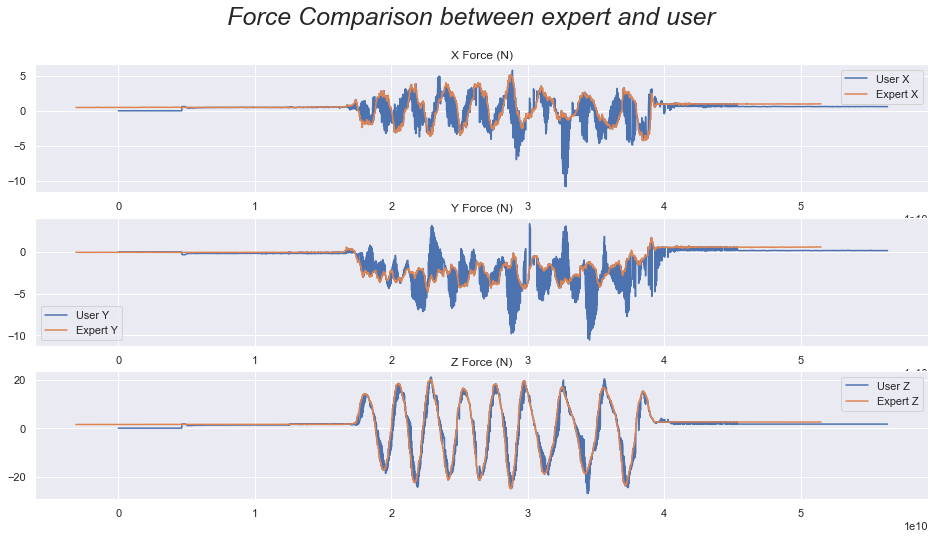

In [7]:
Expert = pd.read_csv('0530/0530Test_HMD.csv')
Expert['Time'] = pd.to_datetime(Expert['Local'])

User = pd.read_csv('0530/0530ReplayTest_HMD.csv')
User['Time'] = pd.to_datetime(User['Local'])


sns.set()



plt.figure(figsize=(16,8))

plt.suptitle(' Force Comparison between expert and user', fontsize=25, fontstyle='italic')
plt.subplot(3,1,1)
d1 = Expert['Time']-Expert['Time'][0] - timedelta(seconds = 3.1)
d2 = User['Time']-User['Time'][0]


plt.plot(d2, User.ExternalForceX, label = 'User X')
plt.plot(d1, Expert.ExternalForceX, label = 'Expert X')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('X Force (N)')
plt.legend()

plt.subplot(3,1,2)
# plt.suptitle(' Force in Y', fontsize=25, fontstyle='italic')
plt.plot(d2, User.ExternalForceY, label = 'User Y')
plt.plot(d1, Expert.ExternalForceY, label = 'Expert Y')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Y Force (N)')
plt.legend()


plt.subplot(3,1,3)
# plt.suptitle(' Force in Z', fontsize=25, fontstyle='italic')
plt.plot(d2, User.ExternalForceZ, label = 'User Z')
plt.plot(d1, Expert.ExternalForceZ, label = 'Expert Z')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Z Force (N)')
plt.legend()

# plt.subplot(2,1,2)
# # plt.plot(standard.O_F_ext_hat_K_3, label = 'X')
# # plt.plot(standard.O_F_ext_hat_K_4, label = 'Y')
# # plt.plot(standard.O_F_ext_hat_K_5, label = 'Z')
# plt.ylim(-10, 15)
# plt.title('Torque (Nm)')
# plt.legend()

In [157]:
rbt

FrameID    EyePosX    EyePosY    EyePosZ  GazePosX  GazePosY  GazePosZ  \
0            0    0.00000    0.00000    0.00000    0.0000    0.0000    0.0000   
1            1 -658.47370  386.77980  235.10260    0.0000    0.0000    0.0000   
2            2 -658.47360  386.46070  240.48340    0.0000    0.0000    0.0000   
3            3 -658.47340  378.59040  248.33830    0.0000    0.0000    0.0000   
4            4 -658.47310  376.16760  261.70290    0.0000    0.0000    0.0000   
...        ...        ...        ...        ...       ...       ...       ...   
70718    70718   14.97113  -14.97113  -14.97113  290.0392  390.8840 -231.8047   
70719    70719   14.97113  -14.97113  -14.97113  286.5250  390.8837 -230.2616   
70720    70720   14.97113  -14.97113  -14.97113  285.0082  390.8836 -229.7766   
70721    70721   14.97113  -14.97113  -14.97113  285.0082  390.8836 -229.7766   
70722    70722   14.97113  -14.97113  -14.97113  285.0082  390.8836 -229.7766   

       GazePointRotX  GazePointRotY  GazePointRotZ  ...  DesiredForceX  \
0                0.0            0.0            0.0  ...       0.000000   
1                0.0            0.0            0.0  ...       0.000000   
2                0.0            0.0            0.0  ...       0.000000   
3                0.0            0.0            0.0  ...       0.000000   
4                0.0            0.0            0.0  ...       0.000000   
...              ...            ...            ...  ...            ...   
70718          270.0            0.0            0.0  ...       0.814451   
70719          270.0            0.0            0.0  ...       0.814451   
70720          270.0            0.0            0.0  ...       0.814451   
70721          270.0            0.0            0.0  ...       0.814451   
70722          270.0            0.0            0.0  ...       0.814451   

       DesiredForceY  DesiredForceZ  DesiredTorqueX  DesiredTorqueY  \
0           0.000000       0.000000        0.000000        0.000000   
1           0.000000       0.000000        0.000000        0.000000   
2           0.000000       0.000000        0.000000        0.000000   
3           0.000000       0.000000        0.000000        0.000000   
4           0.000000       0.000000        0.000000        0.000000   
...              ...            ...             ...             ...   
70718       0.368217       1.301892        0.496941        0.245977   
70719       0.368217       1.301892        0.496941        0.245977   
70720       0.368217       1.301892        0.496941        0.245977   
70721       0.368217       1.301892        0.496941        0.245977   
70722       0.368217       1.301892        0.496941        0.245977   

       DesiredTorqueZ  MotionType  TrialNum                   UTC_MM  \
0             0.00000           0         0  2022-07-08T00:07:26.171   
1             0.00000           0         0  2022-07-08T00:07:35.450   
2             0.00000           0         0  2022-07-08T00:07:35.450   
3             0.00000           0         0  2022-07-08T00:07:35.476   
4             0.00000           0         0  2022-07-08T00:07:35.476   
...               ...         ...       ...                      ...   
70718         0.01906           0         6  2022-07-08T00:20:42.598   
70719         0.01906           0         6  2022-07-08T00:20:42.609   
70720         0.01906           0         6  2022-07-08T00:20:42.640   
70721         0.01906           0         6  2022-07-08T00:20:42.641   
70722         0.01906           0         6  2022-07-08T00:20:42.641   

                         Local  
0      2022-07-07T20:07:26.171  
1      2022-07-07T20:07:35.450  
2      2022-07-07T20:07:35.450  
3      2022-07-07T20:07:35.476  
4      2022-07-07T20:07:35.476  
...                        ...  
70718  2022-07-07T20:20:42.598  
70719  2022-07-07T20:20:42.609  
70720  2022-07-07T20:20:42.640  
70721  2022-07-07T20:20:42.641  
70722  2022-07-07T20:20:42.641  

[70723 rows x 54 columns]

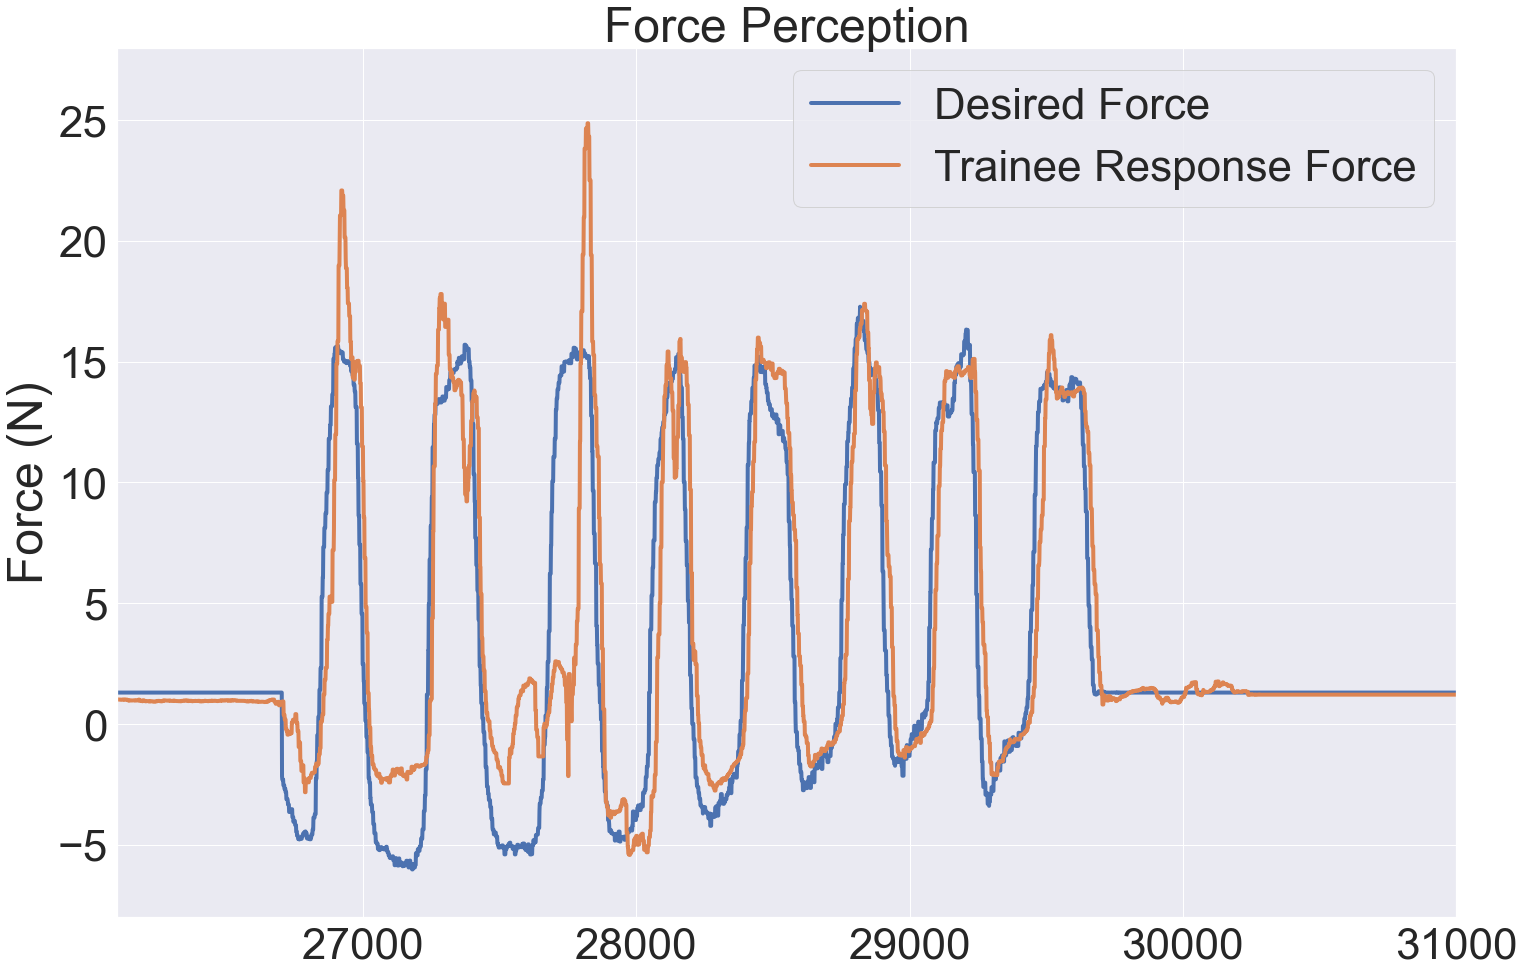

In [181]:
plt.figure(figsize=(24,16))
sns.set(font_scale = 4)
plt.title('Force Perception')
rbt = pd.read_csv('P2_Robot_v2.csv')
plt.plot(rbt.loc[rbt.TrialNum == 1].DesiredForceZ, linewidth = 4,label = 'Desired Force')
plt.plot(rbt.loc[rbt.TrialNum == 1].ExternalForceZ,linewidth = 4, label = 'Trainee Response Force')
plt.xlim([26100,31000])
plt.ylim([-8,28])
plt.ylabel('Force (N)')
plt.legend()

(-8.0, 28.0)

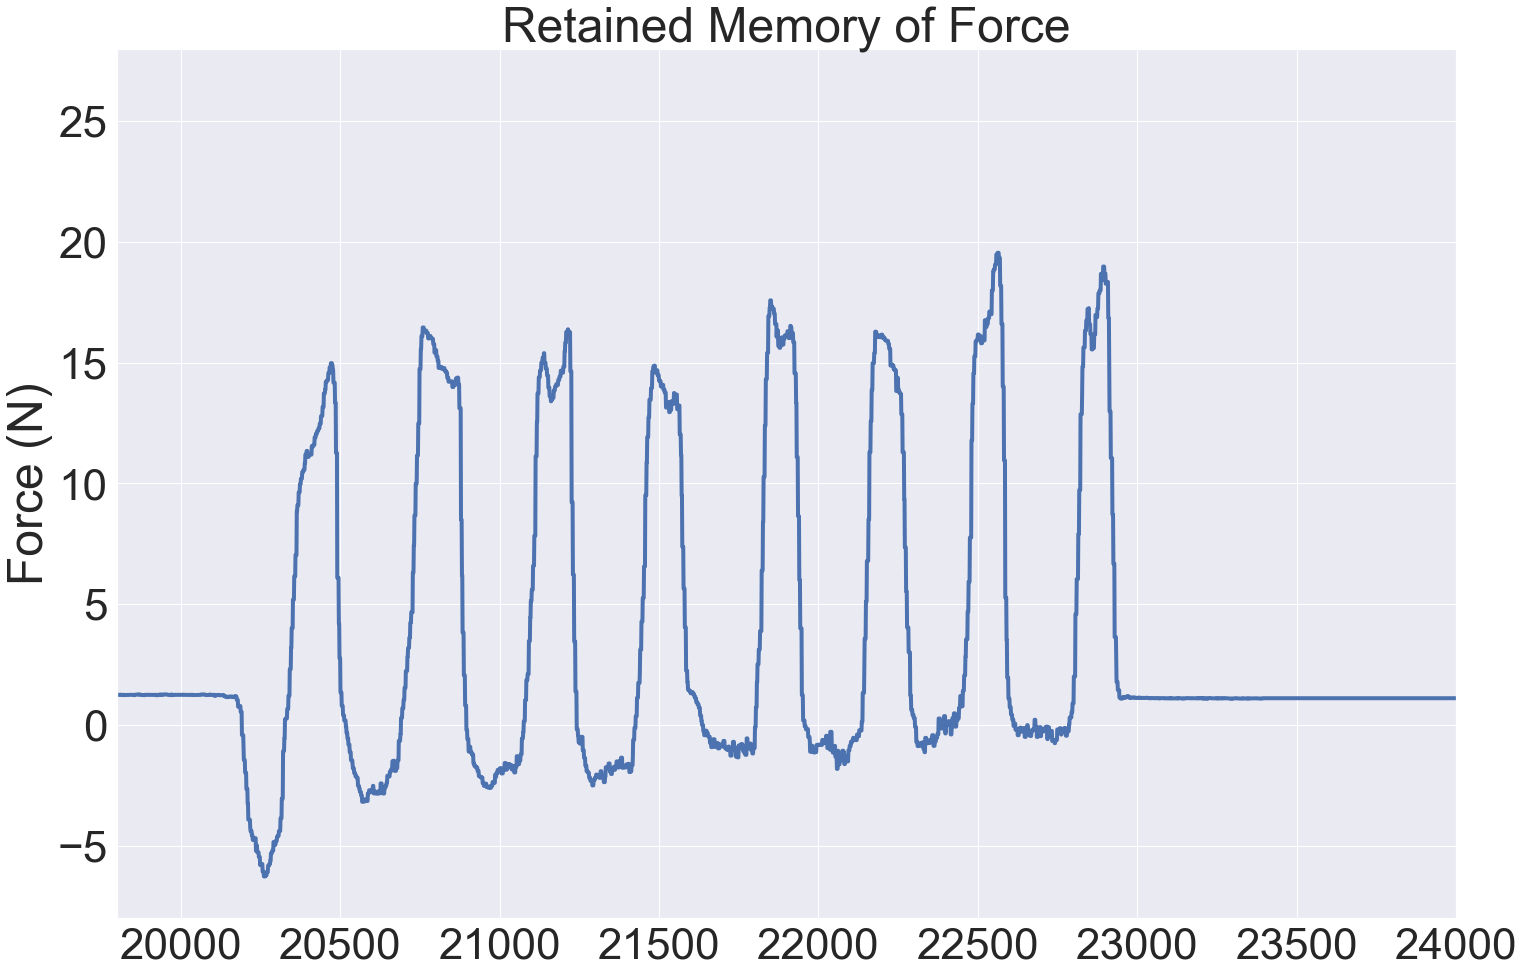

In [182]:
plt.figure(figsize=(24,16))
sns.set(font_scale = 4)
plt.title('Retained Memory of Force')
rbt = pd.read_csv('P2_Robot.csv')
# plt.plot(rbt.loc[rbt.TrialNum == 1].DesiredForceZ, linewidth = 4,label = 'Desired Force')
plt.plot(rbt.loc[rbt.TrialNum == 2].ExternalForceZ,linewidth = 4, label = 'Trainee Response Force')
plt.xlim([19800,24000])
plt.ylabel('Force (N)')
plt.ylim([-8,28])
# plt.legend()

In [96]:
d1

0      -1 days +23:59:56.900000
1      -1 days +23:59:56.921000
2      -1 days +23:59:57.537000
3      -1 days +23:59:57.537000
4      -1 days +23:59:57.538000
                 ...           
5042     0 days 00:00:53.206000
5043     0 days 00:00:53.233000
5044     0 days 00:00:53.234000
5045     0 days 00:00:53.240000
5046     0 days 00:00:53.252000
Name: Time, Length: 5047, dtype: timedelta64[ns]

[INFO]  Data folder 0530/0530ReplayTest already exists. Not creating.


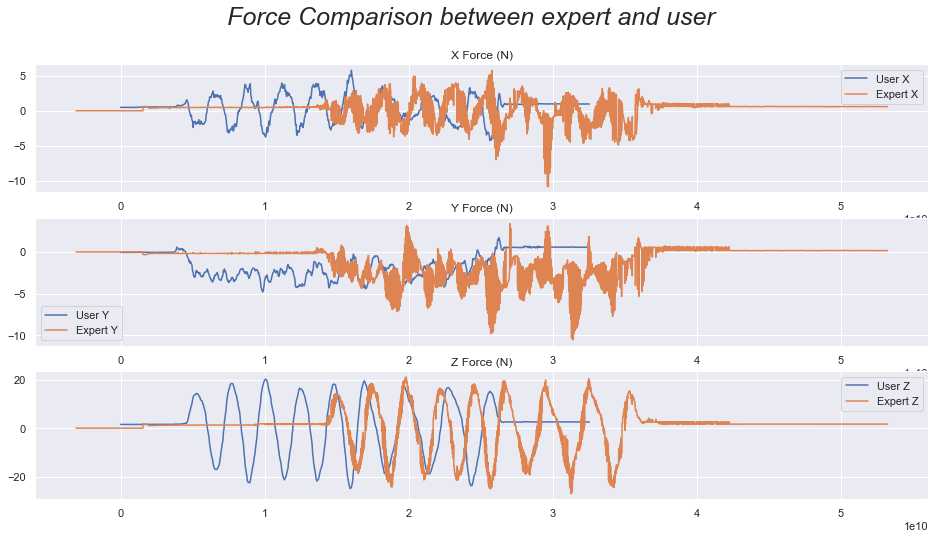

In [98]:
b = bagreader('0530/0530ReplayTest.bag')
data = b.message_by_topic('/reversed_force')
User = pd.read_csv(data)
d2 = (User.Time -User.Time[0])*1e9

Expert = pd.read_csv('0530/0530ReplayTest_HMD.csv')
Expert['Time'] = pd.to_datetime(Expert['Local'])



sns.set()



plt.figure(figsize=(16,8))

plt.suptitle(' Force Comparison between expert and user', fontsize=25, fontstyle='italic')
plt.subplot(3,1,1)
d1 = Expert['Time']-Expert['Time'][0] - timedelta(seconds = 3.1)


plt.plot(d2, User['wrench.force.x'], label = 'User X')
plt.plot(d1, Expert.ExternalForceX, label = 'Expert X')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('X Force (N)')
plt.legend()

plt.subplot(3,1,2)
# plt.suptitle(' Force in Y', fontsize=25, fontstyle='italic')
plt.plot(d2, User['wrench.force.y'], label = 'User Y')
plt.plot(d1, Expert.ExternalForceY, label = 'Expert Y')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Y Force (N)')
plt.legend()


plt.subplot(3,1,3)
# plt.suptitle(' Force in Z', fontsize=25, fontstyle='italic')
plt.plot(d2, User['wrench.force.z'], label = 'User Z')
plt.plot(d1, Expert.ExternalForceZ, label = 'Expert Z')
# plt.plot(standard.O_F_ext_hat_K_2, label = 'Z')
# plt.ylim(-50, 20)
plt.title('Z Force (N)')
plt.legend()

# plt.subplot(2,1,2)
# # plt.plot(standard.O_F_ext_hat_K_3, label = 'X')
# # plt.plot(standard.O_F_ext_hat_K_4, label = 'Y')
# # plt.plot(standard.O_F_ext_hat_K_5, label = 'Z')
# plt.ylim(-10, 15)
# plt.title('Torque (Nm)')
# plt.legend()

# Make Animation

<IPython.core.display.Javascript object>


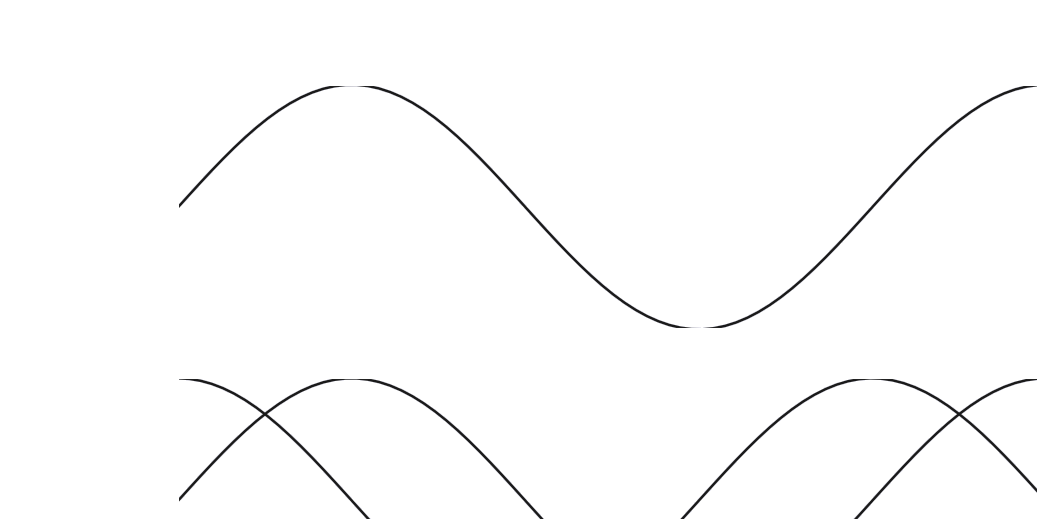

In [68]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display

b = bagreader('1000Pose.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)


x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)
lines = []


fig, axes = plt.subplots(2,1, figsize=(12,6))

line, = axes.flatten()[0].plot(x, y, color='k')
lines.append(line)
line, = axes.flatten()[1].plot(x, y, color='k')
lines.append(line)
line, = axes.flatten()[1].plot(x, z, color='k')
lines.append(line)

def update(num, x, y,z, lines):
    lines[0].set_data(x[:num], y[:num])
    lines[0].axes.axis([0, 5, -1, 1])
    
    lines[1].set_data(x[:num], y[:num])
    lines[1].axes.axis([0, 5, -1, 1])
    
    lines[2].set_data(x[:num], z[:num])
    lines[2].axes.axis([0, 5, -1, 1])
    
    return lines,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y,z, lines],
                              interval=25, blit=True)

# ani.save('test.gif')
plt.show()

In [112]:
Expert.index.shape

(1376,)

In [76]:
y.transpose().shape

(3, 1145)

[INFO]  Data folder 2022-08-09-16-52-14 already exists. Not creating.


<IPython.core.display.Javascript object>


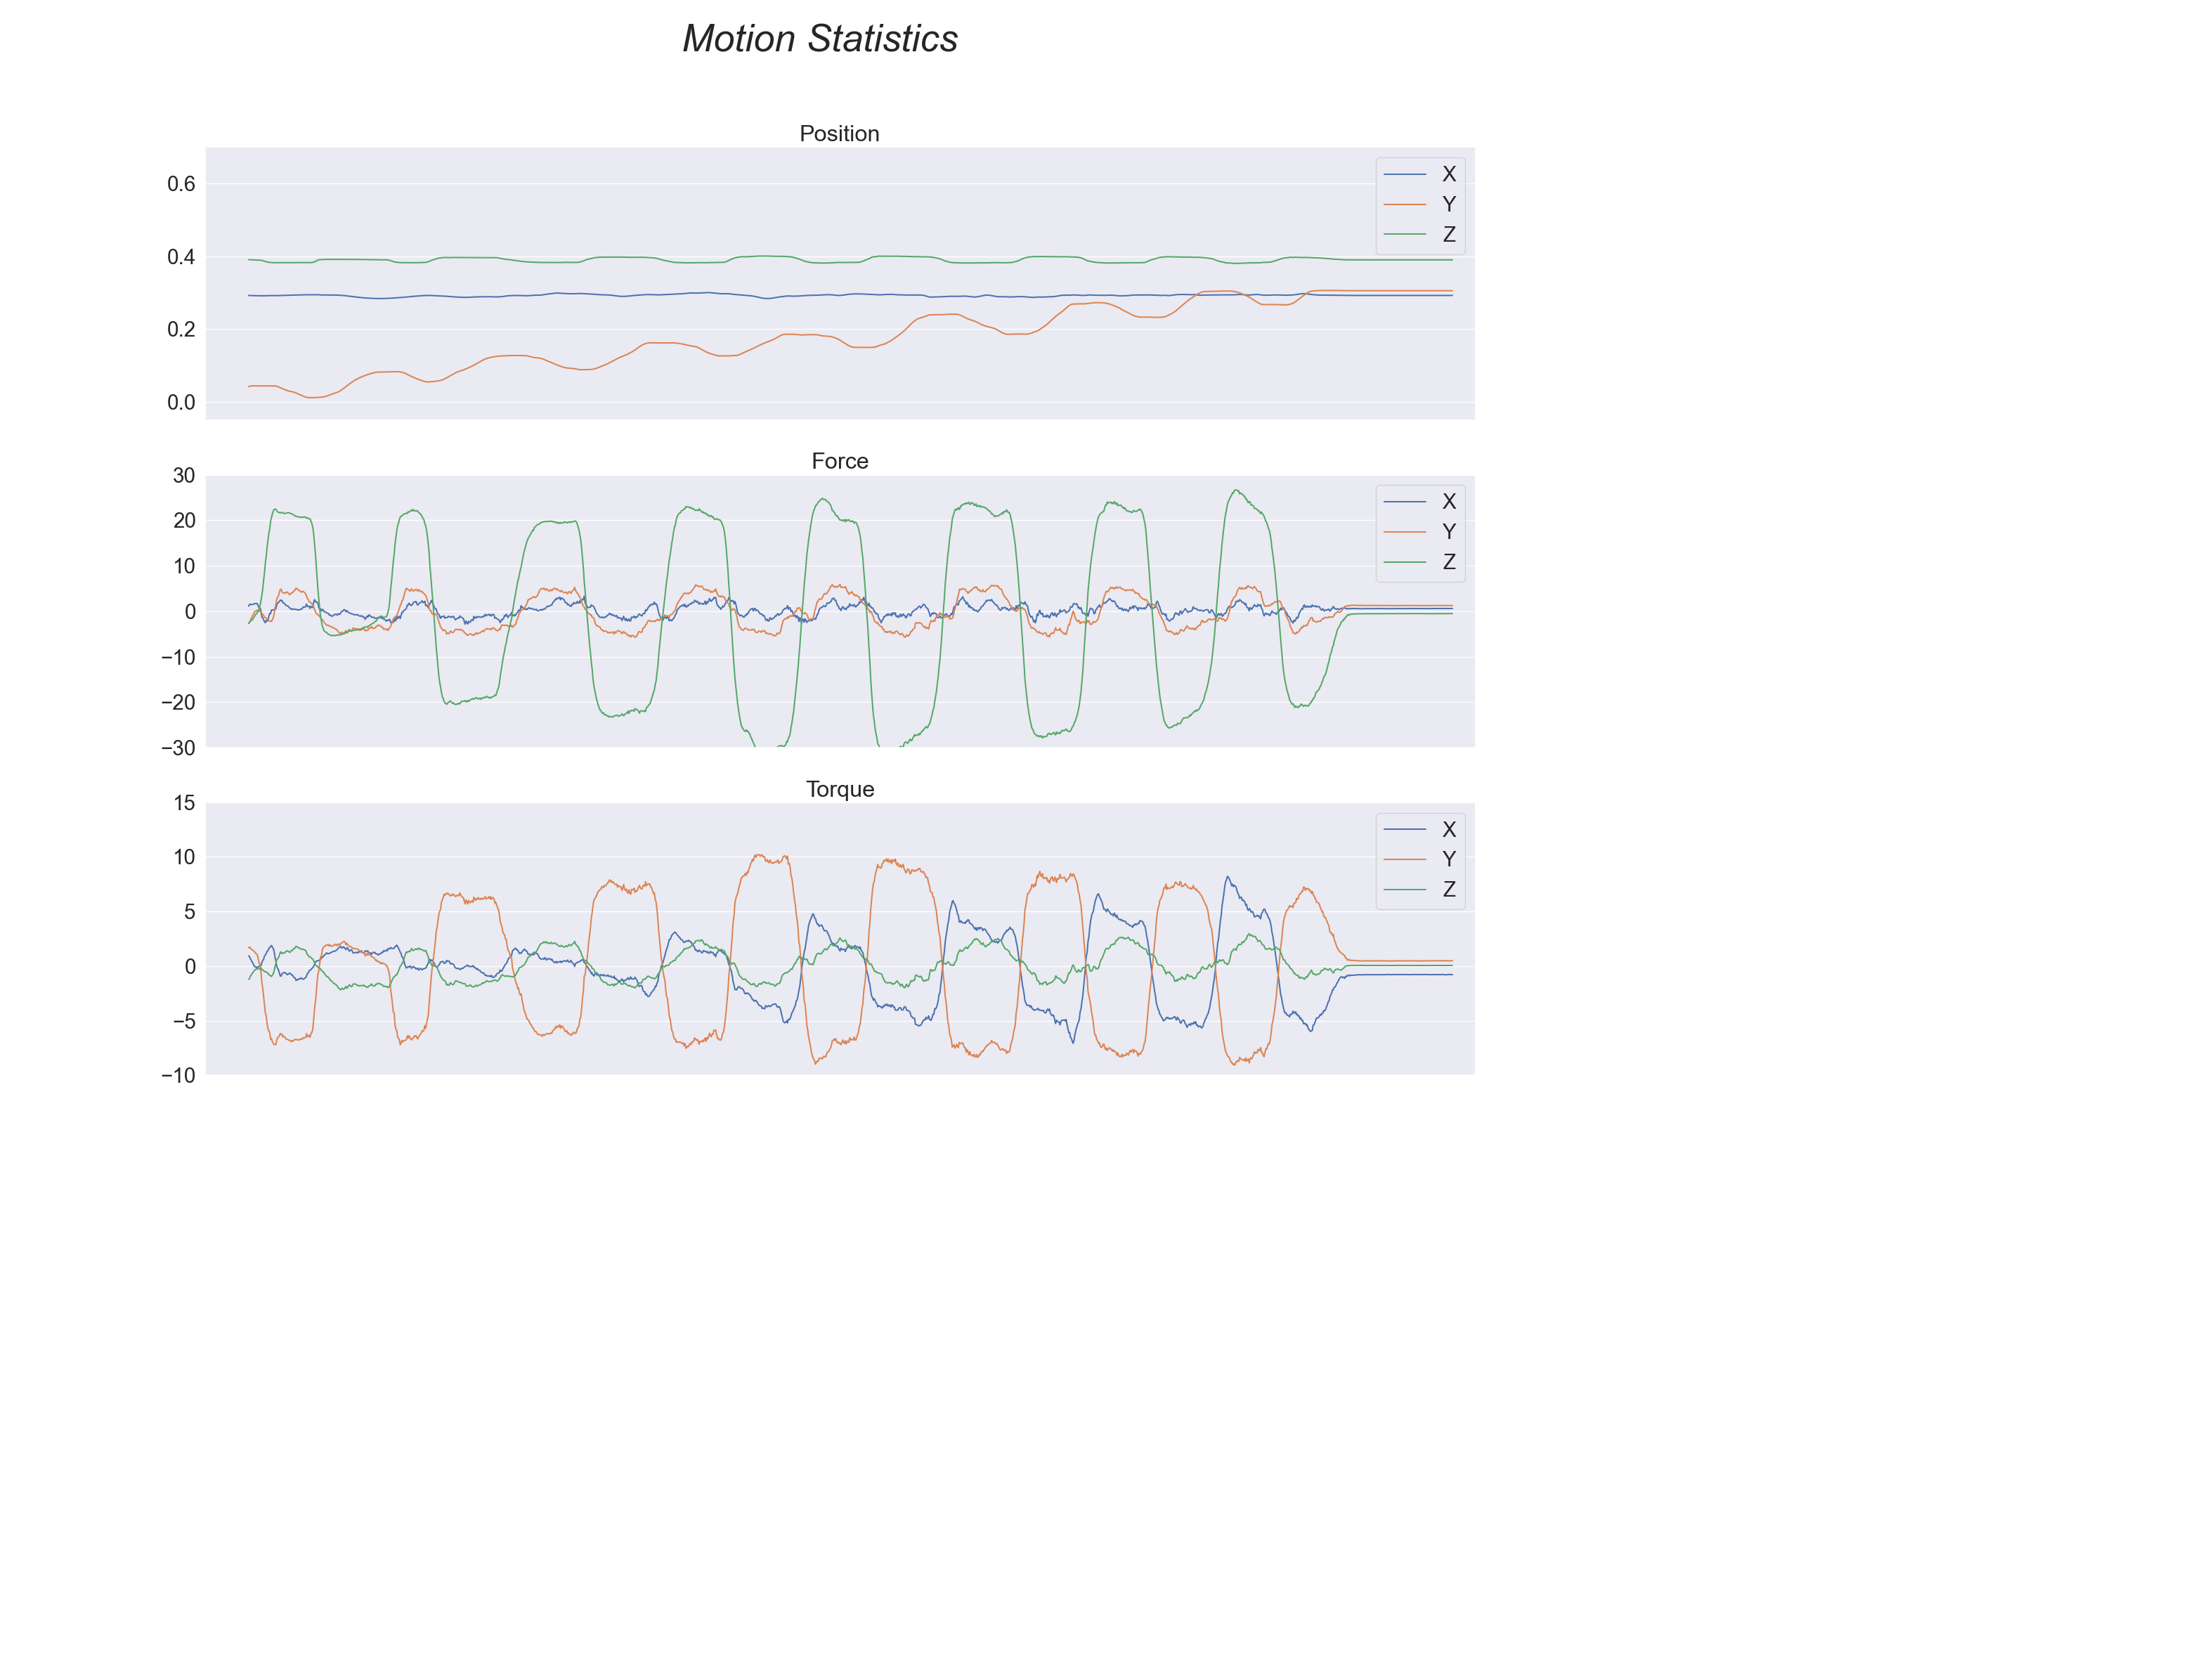

In [132]:
%matplotlib notebook
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from IPython import display

b = bagreader('2022-08-09-16-52-14.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)


x = Expert.index.to_numpy()
r = Expert[['O_T_EE_12','O_T_EE_13','O_T_EE_14']].to_numpy().transpose()
y = Expert[['O_F_ext_hat_K_0','O_F_ext_hat_K_1','O_F_ext_hat_K_2']].to_numpy().transpose()
z = Expert[['O_F_ext_hat_K_3','O_F_ext_hat_K_4','O_F_ext_hat_K_5']].to_numpy().transpose()


lines = []

sns.set()
sns.set(font_scale = 2)
fig, axes = plt.subplots(3,1, figsize=(24,18))
labels = ['X','Y','Z', 'X','Y','Z','X-Axis','Y-Axis','Z-Axis']

for i in range(3):
    
    line, = axes.flatten()[0].plot(x, r[i], label = labels[i])
    lines.append(line)
    axes.flatten()[0].xaxis.set_major_locator(ticker.NullLocator())
    axes.flatten()[0].set_title('Position')
    axes.flatten()[0].legend()
    
    line, = axes.flatten()[1].plot(x, y[i], label = labels[i])
    lines.append(line)
    axes.flatten()[1].xaxis.set_major_locator(ticker.NullLocator())
    axes.flatten()[1].set_title('Force')
    axes.flatten()[1].legend()

    line, = axes.flatten()[2].plot(x, z[i], label = labels[3+i])
    lines.append(line)
    axes.flatten()[2].xaxis.set_major_locator(ticker.NullLocator())
    axes.flatten()[2].set_title('Torque')
    axes.flatten()[2].legend()
    
    
plt.suptitle('Motion Statistics', fontsize=40, fontstyle='italic')
plt.rcParams['animation.ffmpeg_path'] = 'C:\\FFmpeg\\bin\\ffmpeg.exe'
def update(num, x,r, y, z, lines):
    for i in range(3):
        lines[i*3].set_data(x[:num], r[i, :num])
        lines[i*3].axes.axis([-50, 1400, -0.05, 0.7])
        
        lines[i*3+1].set_data(x[:num], y[i, :num])
        lines[i*3+1].axes.axis([-50, 1400, -30, 30])
    
        lines[i*3+2].set_data(x[:num], z[i,:num])
        lines[i*3+2].axes.axis([-50, 1400, -10, 15])
    return lines,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, r, y,z, lines],
                              interval=4, blit=True)

FFwriter=animation.FFMpegWriter(fps=60, extra_args=['-vcodec', 'libx264'])
ani.save('DemoExpertv2.mp4', writer = FFwriter)
plt.show()

In [139]:
b = bagreader('1000NewPose.bag')
data = b.message_by_topic('/recorded_force')
pd.read_csv(data)

[INFO]  Data folder 1000NewPose already exists. Not creating.


Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0    1.659028e+09           0                  0                   0   
1    1.659028e+09           0                  0                   0   
2    1.659028e+09           0                  0                   0   
3    1.659028e+09           0                  0                   0   
4    1.659028e+09           0                  0                   0   
..            ...         ...                ...                 ...   
751  1.659028e+09           0                  0                   0   
752  1.659028e+09           0                  0                   0   
753  1.659028e+09           0                  0                   0   
754  1.659028e+09           0                  0                   0   
755  1.659028e+09           0                  0                   0   

     header.frame_id    axes_0    axes_1    axes_2    axes_3    axes_4  \
0                NaN -1.386850 -5.566181 -3.649890  2.079503  1.145183   
1                NaN -1.168361 -5.758872 -3.849530  2.125668  1.302897   
2                NaN -1.321994 -5.232792 -3.954868  1.929895  1.266743   
3                NaN -0.888248 -4.975210 -4.086126  1.818676  1.489421   
4                NaN -1.478313 -4.194068 -3.833676  1.547042  1.190045   
..               ...       ...       ...       ...       ...       ...   
751              NaN  0.719738  1.608633  2.047508 -0.235655 -0.082835   
752              NaN  0.739267  1.604415  2.060462 -0.229319 -0.075156   
753              NaN  0.712134  1.593400  2.058750 -0.222498 -0.090635   
754              NaN  0.718627  1.599088  2.045998 -0.229037 -0.083600   
755              NaN  0.739743  1.610455  2.041770 -0.235559 -0.072309   

       axes_5  
0   -2.401132  
1   -2.452972  
2   -2.258347  
3   -2.175950  
4   -1.823871  
..        ...  
751 -0.073868  
752 -0.079071  
753 -0.075512  
754 -0.075984  
755 -0.080807  

[756 rows x 11 columns]

[INFO]  Data folder 1000NewPose already exists. Not creating.


<IPython.core.display.Javascript object>


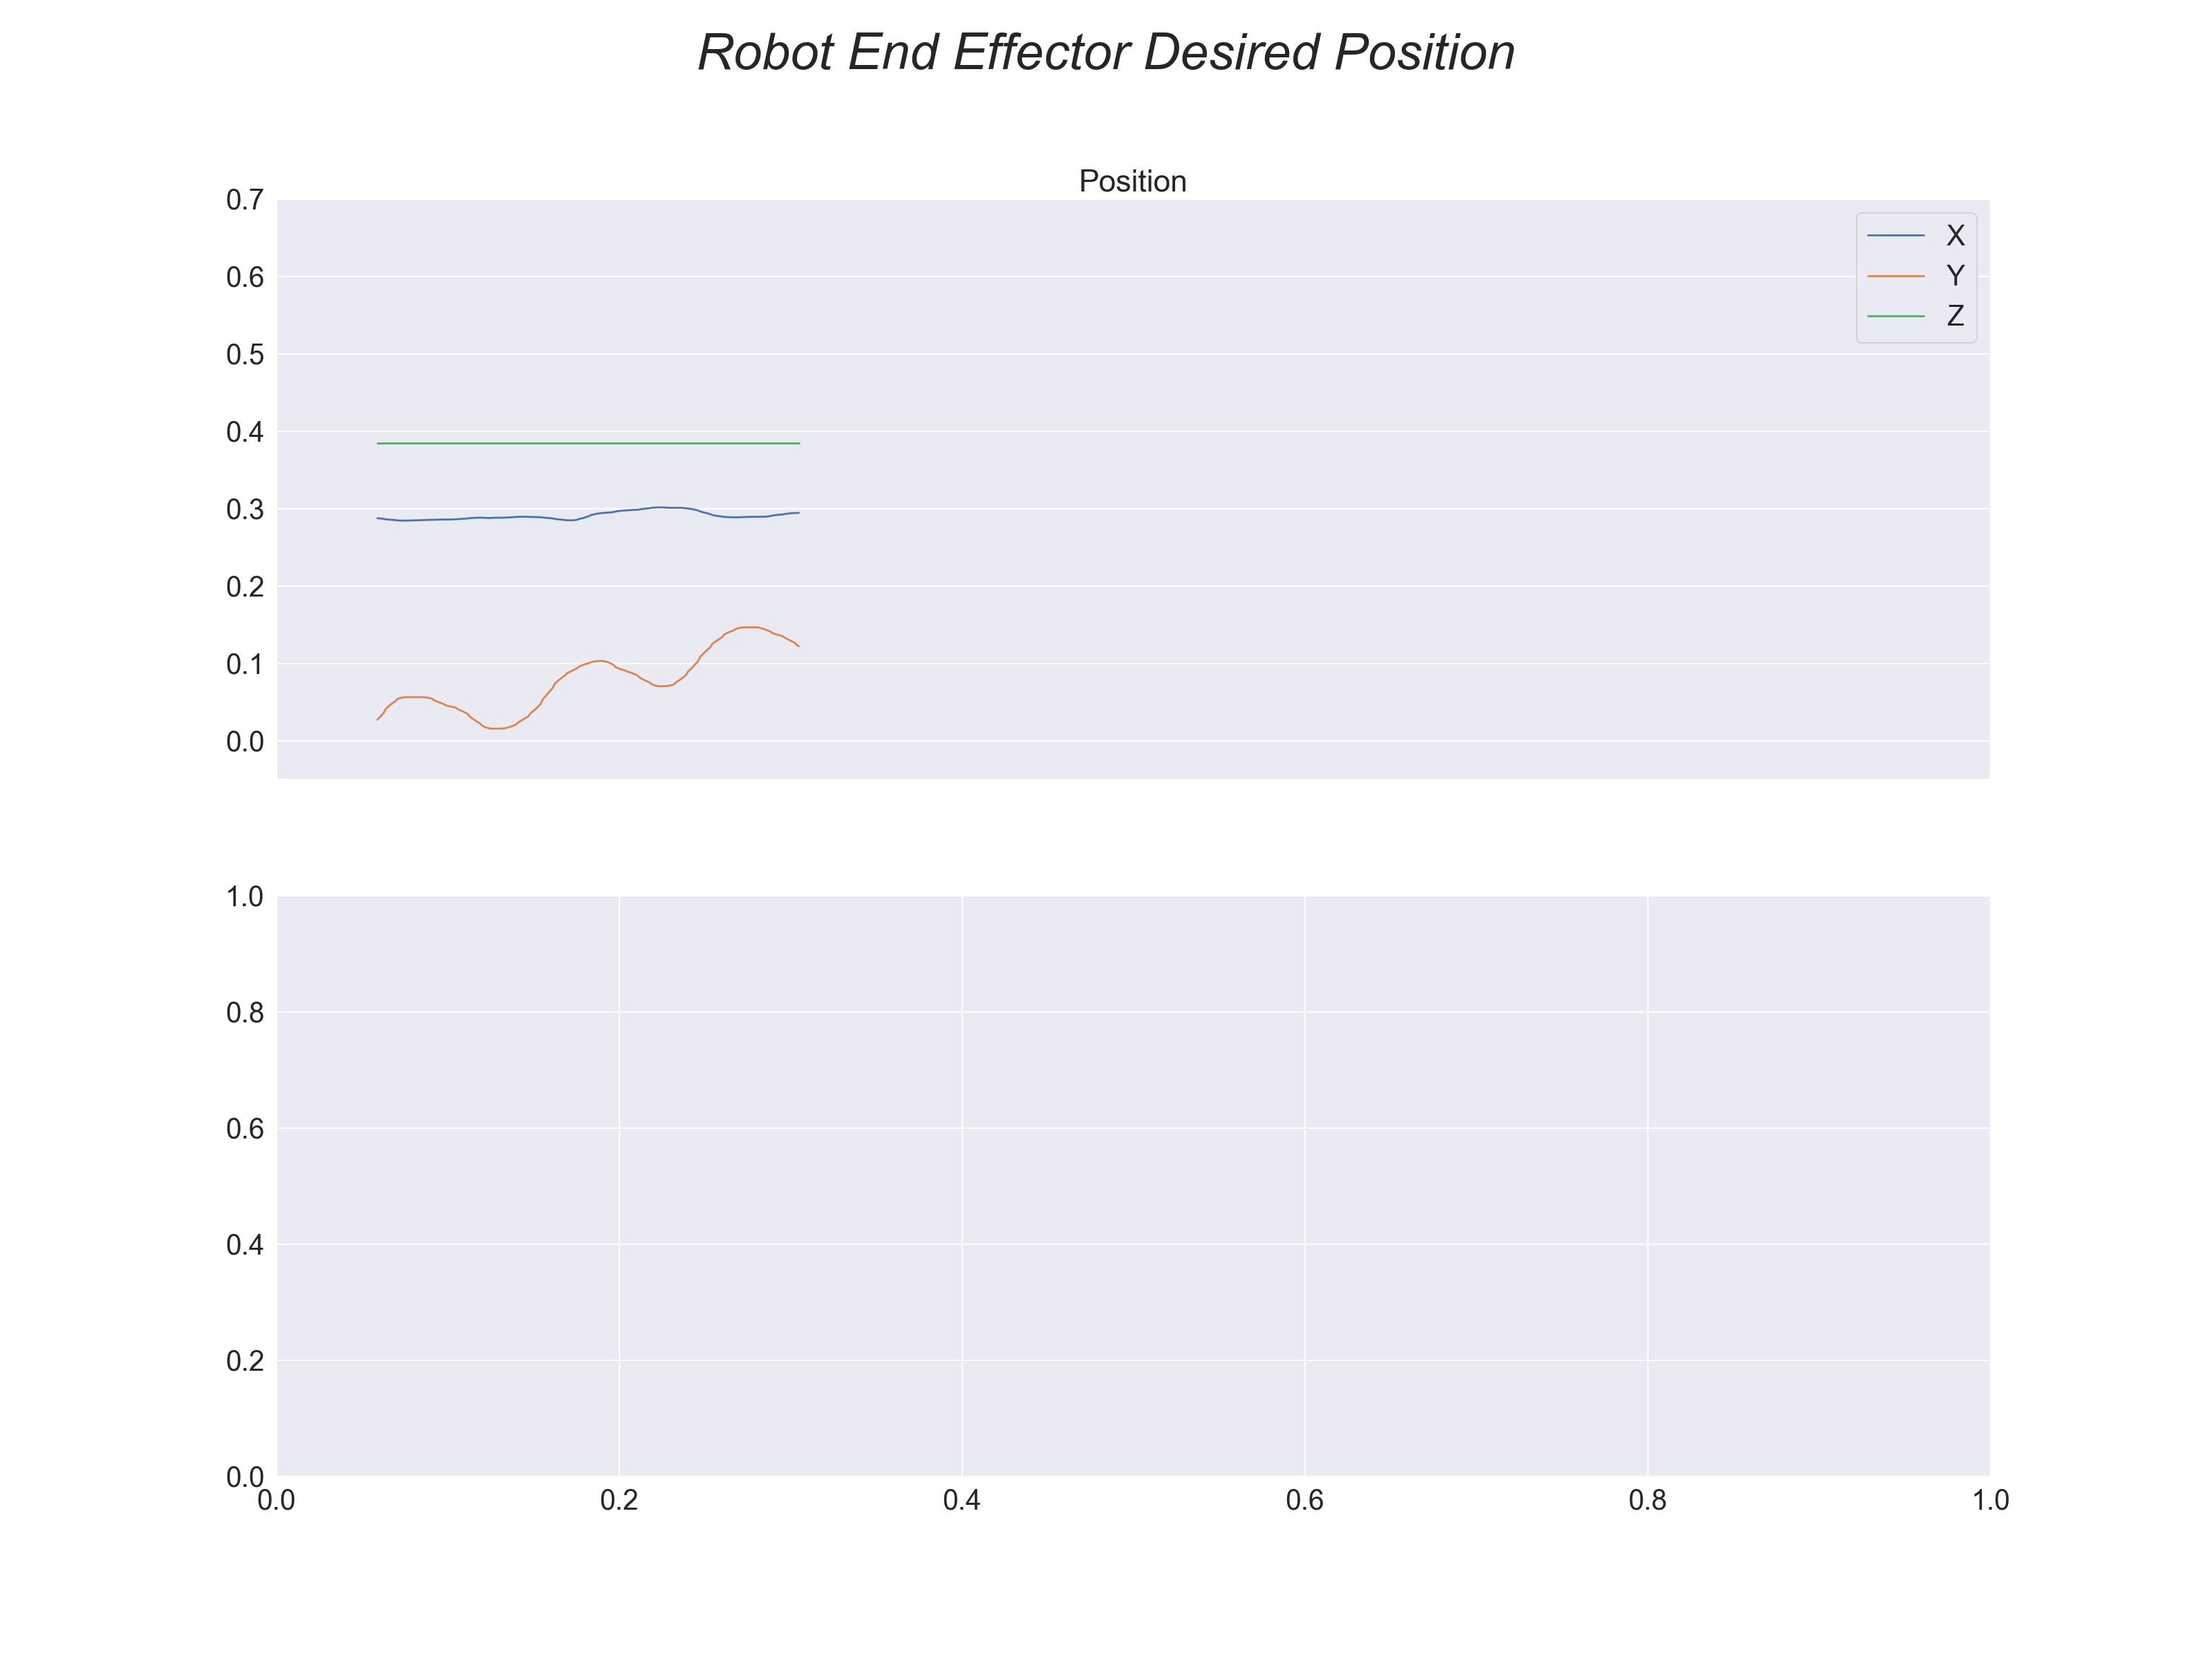

In [10]:
%matplotlib notebook
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from IPython import display

b = bagreader('1000NewPose.bag')
data = b.message_by_topic('/recorded_force_no_vertical')
Expert = pd.read_csv(data)


x = Expert.index.to_numpy()
r = Expert[['pose.position.x','pose.position.y','pose.position.z']].to_numpy().transpose()


lines = []

sns.set()
sns.set(font_scale = 2)
fig, axes = plt.subplots(2,1, figsize=(24,18))
labels = ['X','Y','Z']

for i in range(3):
    
    line, = axes.flatten()[0].plot(x, r[i], label = labels[i])
    lines.append(line)
    axes.flatten()[0].xaxis.set_major_locator(ticker.NullLocator())
    axes.flatten()[0].set_title('Position')
    axes.flatten()[0].legend()
    
plt.suptitle('Robot End Effector Desired Position', fontsize=40, fontstyle='italic')
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\FFmpeg\\bin\\ffmpeg.exe'

# import os
# f = open (os.path.expanduser("~/Desktop/somedir/somefile.txt"))

plt.rcParams['animation.ffmpeg_path'] = r"/Users/yeyang/anaconda3/bin/ffmpeg"
# /Users/yeyang/anaconda3/bin
def update(num, x,r, lines):
    for i in range(3):
        lines[i].set_data(x[:num], r[i, :num])
        lines[i].axes.axis([-50, 800, -0.05, 0.7])
    return lines,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, r, lines],
                              interval=4, blit=True)

FFwriter=animation.FFMpegWriter(fps=60, extra_args=['-vcodec', 'libx264'])
ani.save('UserPositionv2.mp4', writer = FFwriter)
plt.show()

[INFO]  Data folder 1000NewPose already exists. Not creating.


<IPython.core.display.Javascript object>


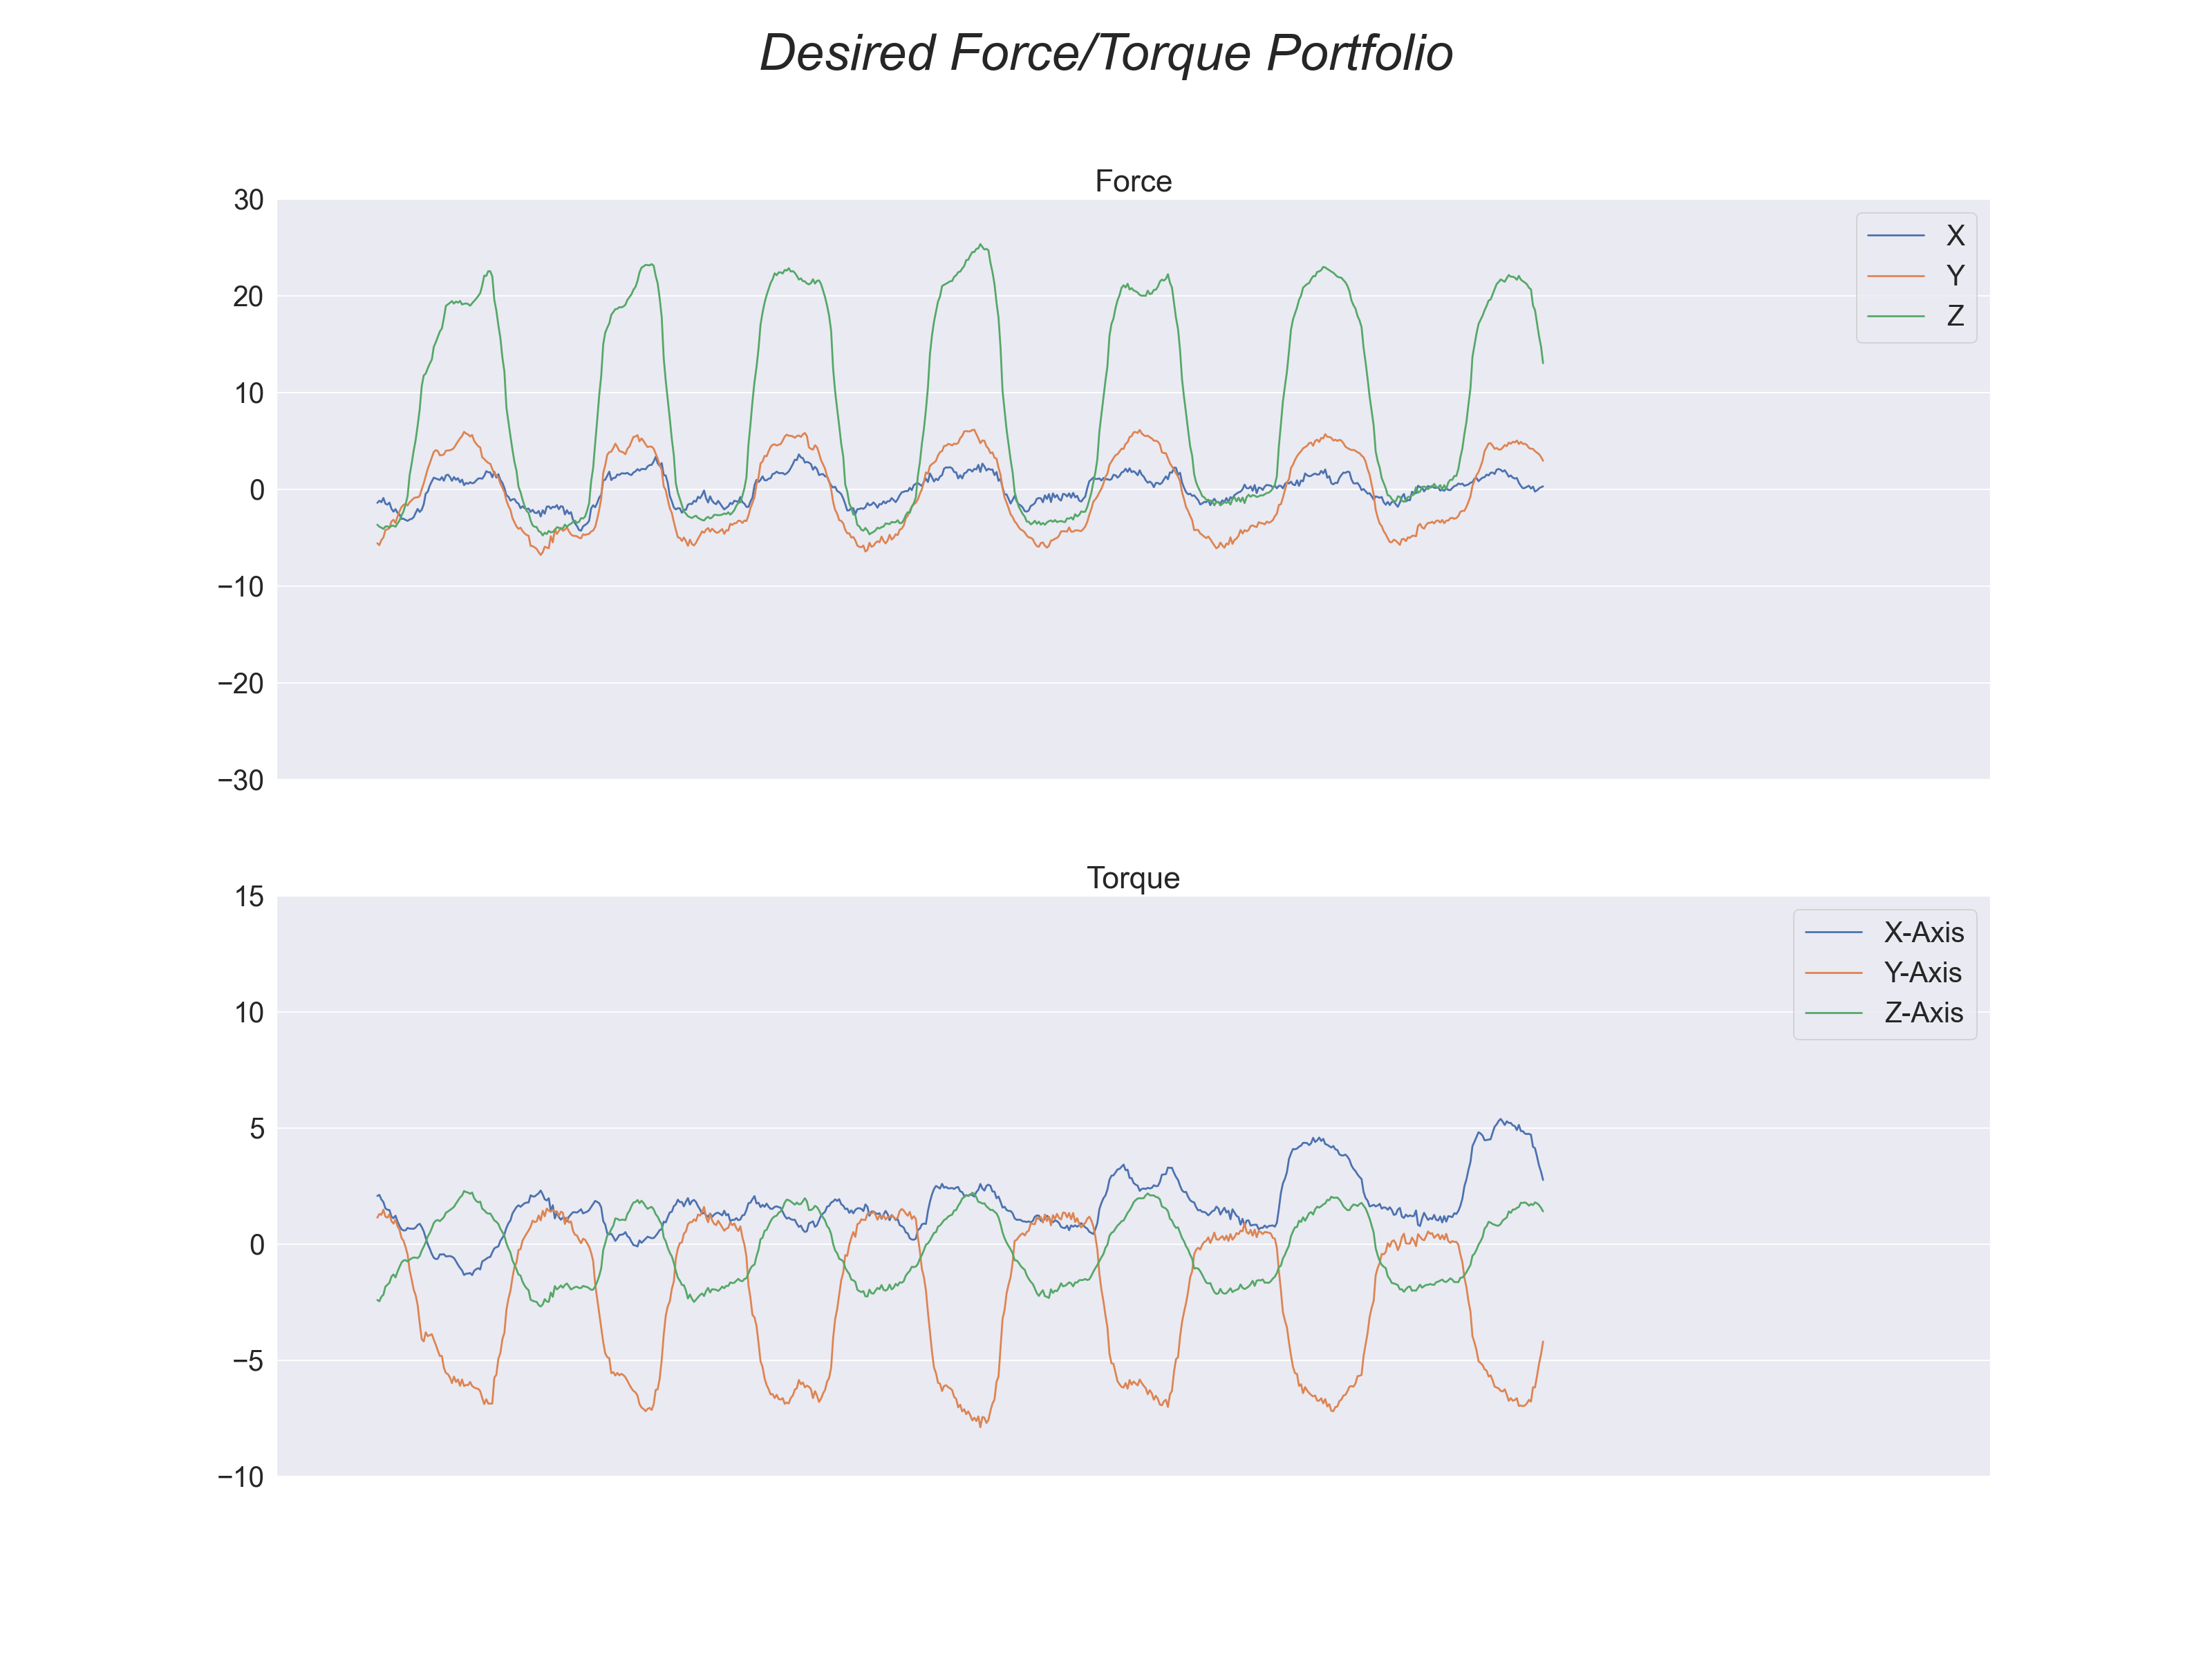

In [8]:
%matplotlib notebook
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.ticker as ticker
from IPython import display

b = bagreader('1000NewPose.bag')
data = b.message_by_topic('/recorded_force')
Expert = pd.read_csv(data)


x = Expert.index.to_numpy()
y = Expert[['axes_0','axes_1','axes_2']].to_numpy().transpose()
z = Expert[['axes_3','axes_4','axes_5']].to_numpy().transpose()


lines = []

sns.set()
sns.set(font_scale = 2)
fig, axes = plt.subplots(2,1, figsize=(24,18))
labels = [ 'X','Y','Z','X-Axis','Y-Axis','Z-Axis']

for i in range(3):

    
    line, = axes.flatten()[0].plot(x, y[i], label = labels[i])
    lines.append(line)
    axes.flatten()[0].xaxis.set_major_locator(ticker.NullLocator())
    axes.flatten()[0].set_title('Force')
    axes.flatten()[0].legend()

    line, = axes.flatten()[1].plot(x, z[i], label = labels[3+i])
    lines.append(line)
    axes.flatten()[1].xaxis.set_major_locator(ticker.NullLocator())
    axes.flatten()[1].set_title('Torque')
    axes.flatten()[1].legend()
    
    
plt.suptitle('Desired Force/Torque Portfolio', fontsize=40, fontstyle='italic')
# plt.rcParams['animation.ffmpeg_path'] = 'C:\\FFmpeg\\bin\\ffmpeg.exe'
def update(num, x, y, z, lines):
    for i in range(3):
        lines[i*2].set_data(x[:num], y[i, :num])
        lines[i*2].axes.axis([-50, 800, -30, 30])
    
        lines[i*2+1].set_data(x[:num], z[i,:num])
        lines[i*2+1].axes.axis([-50, 800, -10, 15])
    return lines,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y,z, lines],
                              interval=4, blit=True)

FFwriter=animation.FFMpegWriter(fps=60, extra_args=['-vcodec', 'libx264'])
ani.save('UserForcev2.mp4', writer = FFwriter)
plt.show()

0


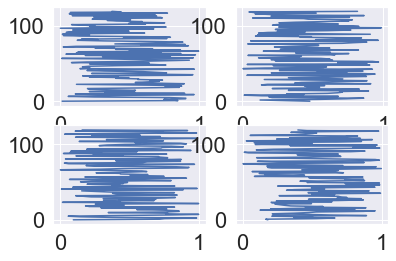

In [57]:
# %matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data=np.random.rand(4, 50, 150)
Z=np.arange(0,120,.8)

fig, axes = plt.subplots(2,2)

lines=[]

for nd, ax in enumerate(axes.flatten()):
    l, = ax.plot(data[nd,0], Z)
    lines.append(l)

def run(it):
    print(it)
    for nd, line in enumerate(lines):
        line.set_data(data[nd, it], Z)
    return lines


ani=animation.FuncAnimation(fig, run, frames=np.arange(0,data.shape[1]), 
                            interval=30, blit=True)
# ani.save('mwe.mp4')

# plt.show()

[INFO]  Data folder 1000Pose already exists. Not creating.


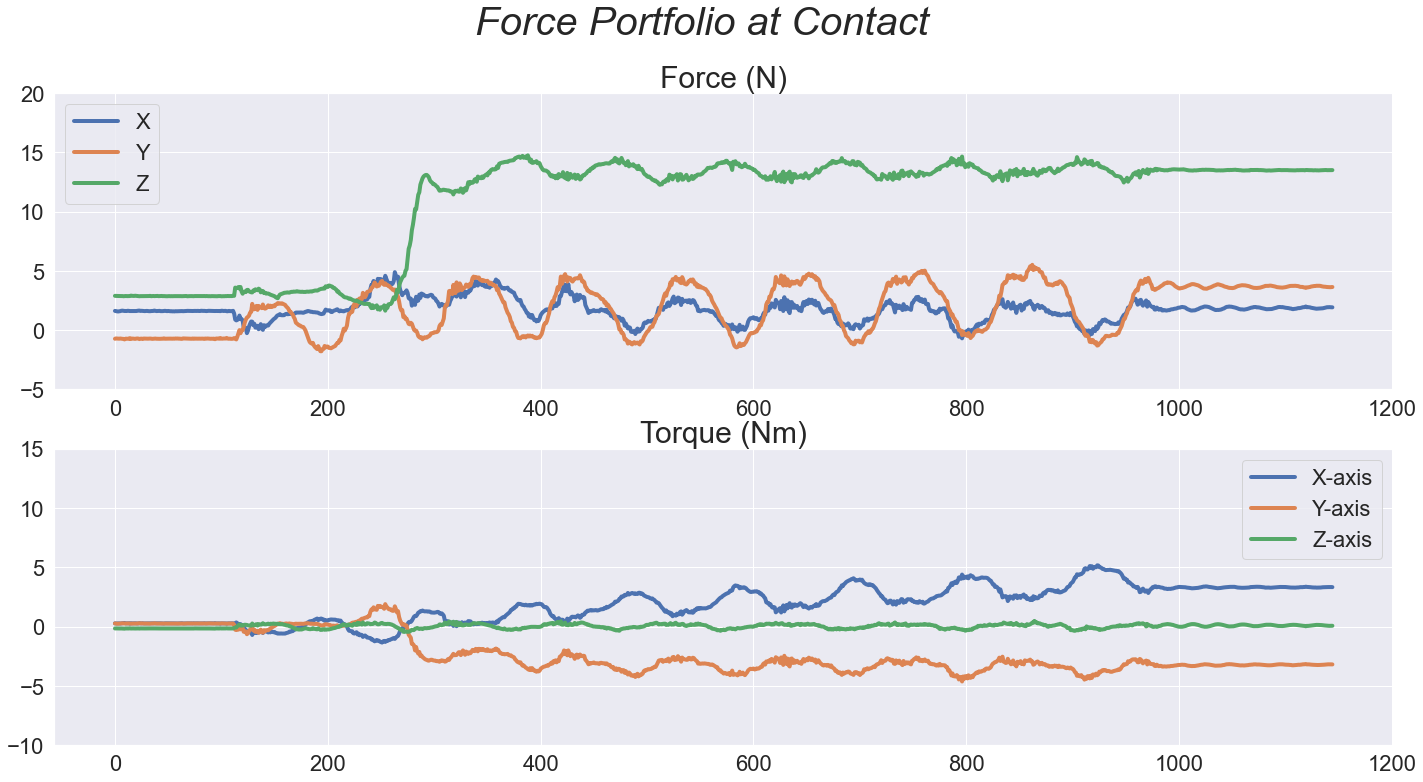

In [20]:
%matplotlib inline

b = bagreader('1000Pose.bag')
data = b.message_by_topic('/franka_state_controller/franka_states')
Expert = pd.read_csv(data)

sns.set()
sns.set(font_scale = 2)
plt.figure(figsize=(24,12))

plt.suptitle('Force Portfolio at Contact', fontsize=40, fontstyle='italic')
plt.subplot(2,1,1)
plt.plot(Expert.O_F_ext_hat_K_0,linewidth=4, label = 'X',)
plt.plot(Expert.O_F_ext_hat_K_1,linewidth=4, label = 'Y')
plt.plot(Expert.O_F_ext_hat_K_2,linewidth=4, label = 'Z')
plt.ylim(-5, 20)
plt.title('Force (N)', fontsize=30)
plt.legend()

plt.subplot(2,1,2)
plt.plot(Expert.O_F_ext_hat_K_3, linewidth=4,label = 'X-axis')
plt.plot(Expert.O_F_ext_hat_K_4, linewidth=4,label = 'Y-axis')
plt.plot(Expert.O_F_ext_hat_K_5, linewidth=4,label = 'Z-axis')
plt.ylim(-10, 15)
plt.title('Torque (Nm)', fontsize=30)
plt.legend()

In [ ]:
2022-08-09-16-52-14.bag